# Analyse results
Here we will analyze the first results of the experiments

## Data Loading
We load the data and merge the  different files. Furthermore, we rename the variables for ansatz, optimizer and featuremap to make the more user friendly.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

from scipy.stats import friedmanchisquare,  wilcoxon, kruskal, mannwhitneyu

sns.set(font_scale=1.25)
sns.set(style='white', palette=None)

In [2]:
declare = True

res = []

for optimizer in ['cobyla', 'spsa', 'neldermead']:
    for preprocessing in ['pca', 'lda']:
        for init in ['uniform', 'normal', 'beta']:
            r = pd.read_csv("../reports/results/kdd_ibm_perth_{}_{}_{}_results.csv".format(optimizer, preprocessing, init), index_col=0)
            r['initialization'] = init

            res.append(r)

res = pd.concat(res)
res.head()

accuracy        f1          time   
index                                     
20        0.772  0.731237   9670.959344  \
21        0.808  0.781830   8580.804739   
22        0.816  0.789921   8525.117397   
23        0.836  0.846410   8504.267138   
24        0.660  0.654390  14641.577159   

                                              ansatz   
index                                                  
20     <function get_efficientsu2 at 0x7f16c9920790>  \
21     <function get_efficientsu2 at 0x7f16c9920790>   
22     <function get_efficientsu2 at 0x7f16c9920790>   
23     <function get_efficientsu2 at 0x7f16c9920790>   
24     <function get_efficientsu2 at 0x7f16c9920790>   

                                     optimizer   
index                                            
20     <function get_cobyla at 0x7f16c9920820>  \
21     <function get_cobyla at 0x7f16c9920820>   
22     <function get_cobyla at 0x7f16c9920820>   
23     <function get_cobyla at 0x7f16c9920820>   
24     <function get_cobyla at 0x7f16c9920820>   

                                          featuremap entanglement   
index                                                               
20      <function get_zfeaturemap at 0x7f16d04e8d30>         full  \
21      <function get_zfeaturemap at 0x7f16d04e8d30>       linear   
22      <function get_zfeaturemap at 0x7f16d04e8d30>     circular   
23      <function get_zfeaturemap at 0x7f16d04e8d30>          sca   
24     <function get_zzfeaturemap at 0x7f16d04e8dc0>         full   

      entanglement_featuremap  iterations preprocessing      noise   
index                                                                
20                        NaN         250           pca  ibm_perth  \
21                        NaN         250           pca  ibm_perth   
22                        NaN         250           pca  ibm_perth   
23                        NaN         250           pca  ibm_perth   
24                       full         250           pca  ibm_perth   

      initialization  
index                 
20           uniform  
21           uniform  
22           uniform  
23           uniform  
24           uniform

In [3]:
# if ansatz contains 'efficientsu2' replace with 'efficient_su2'
res['ansatz'] = res['ansatz'].apply(lambda x: 'efficient_su2' if 'efficientsu2' in x else x)
# if ansatz = 'paulitwodesign' replace with 'pauli_two_design'
res['ansatz'] = res['ansatz'].apply(lambda x: 'pauli_two_design' if 'paulitwodesign' in x else x)
# if ansatz = 'realamplitudes' replace with 'real_amplitudes'
res['ansatz'] = res['ansatz'].apply(lambda x: 'real_amplitudes' if 'realamplitudes' in x else x)
# if ansatz = 'twolocal' replace with 'two_local'
res['ansatz'] = res['ansatz'].apply(lambda x: 'two_local' if 'twolocal' in x else x)
# otherwise drop
res = res[res['ansatz'].isin(['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local'])]

In [4]:
# if optimizer contains 'cobyla' replace with 'cobyla'
res['optimizer'] = res['optimizer'].apply(lambda x: 'cobyla' if 'cobyla' in x else x)
# if optimizer = 'lbfgsb' replace with 'l_bfgs_b'
res['optimizer'] = res['optimizer'].apply(lambda x: 'spsa' if 'spsa' in x else x)
# if optimizer = 'neldermead' replace with 'nelder_mead'
res['optimizer'] = res['optimizer'].apply(lambda x: 'nelder_mead' if 'neldermead' in x else x)

In [5]:
# if feature_map = 'ZZFeatureMap' replace with 'zz'
res['featuremap'] = res['featuremap'].apply(lambda x: 'zz' if 'zzfeaturemap' in x else x)
# if feature_map = 'ZFeatureMap' replace with 'z'
res['featuremap'] = res['featuremap'].apply(lambda x: 'z' if 'zfeaturemap' in x else x)

In [6]:
# consider configurations that are within 10% of the best configuration (accuracy)
best_configs = res[res['accuracy'] > max(res['accuracy']) - 0.1]

worst = res[res['accuracy'] < min(res['accuracy']) + 0.1]

index = ['ansatz', 'featuremap', 'entanglement', 'entanglement_featuremap', 'preprocessing', 'optimizer', 'initialization']

# remove column 'noise'
res = res.drop(columns=['noise'])

In [7]:
# sort by performance
res = res.sort_values(by=['f1', 'accuracy'], ascending=False).reset_index(drop=True)
res.head()

accuracy        f1         time           ansatz optimizer featuremap   
0     0.968  0.954793  7300.893983        two_local    cobyla          z  \
1     0.960  0.950582  6462.906256        two_local    cobyla          z   
2     0.964  0.948841  6248.173570        two_local    cobyla          z   
3     0.960  0.944965  6947.493526  real_amplitudes    cobyla          z   
4     0.960  0.944862  8569.215865    efficient_su2      spsa          z   

  entanglement entanglement_featuremap  iterations preprocessing   
0       linear                     NaN         238           lda  \
1          sca                     NaN         210           lda   
2     pairwise                     NaN         203           lda   
3       linear                     NaN         226           lda   
4       linear                     NaN         251           lda   

  initialization  
0           beta  
1           beta  
2           beta  
3           beta  
4           beta

In [8]:
res.tail()

accuracy        f1          time           ansatz    optimizer   
1507     0.016  0.012343  11620.152128        two_local  nelder_mead  \
1508     0.020  0.010818  10539.956868  real_amplitudes  nelder_mead   
1509     0.016  0.009690  13916.353066        two_local  nelder_mead   
1510     0.004  0.000267  18519.980483    efficient_su2  nelder_mead   
1511     0.000  0.000000  23898.141034    efficient_su2  nelder_mead   

     featuremap entanglement entanglement_featuremap  iterations   
1507          z          sca                     NaN         377  \
1508          z       linear                     NaN         342   
1509         zz       linear                circular         348   
1510          z         full                     NaN         479   
1511         zz         full                     sca         487   

     preprocessing initialization  
1507           lda           beta  
1508           pca           beta  
1509           lda           beta  
1510           lda           beta  
1511           pca           beta

## Optimizer
We first consider the optimizer.
* All in all, NelderMead by far the worst
* The three optimizers perform significantly different
* SPSA is significantly better than COBYLA
* But both SPSA and Cobyla are significantly better than Nelder-Mead

In [9]:
res.groupby(['optimizer']).agg({"accuracy":[np.mean, np.std], "f1":[np.mean, np.std]})

accuracy                  f1          
                 mean       std      mean       std
optimizer                                          
cobyla       0.662603  0.096069  0.668153  0.091709
nelder_mead  0.164619  0.126333  0.180760  0.145232
spsa         0.660460  0.088977  0.664671  0.090062

In [10]:
c = res[res['optimizer'] == 'cobyla'].set_index(index).sort_index()
n = res[res['optimizer'] == 'nelder_mead'].set_index(index).sort_index()
s = res[res['optimizer'] == 'spsa'].set_index(index).sort_index()

In [11]:
# Friedman test
print("Friedman: significantly different: ", friedmanchisquare(c['accuracy'], n['accuracy'], s['accuracy']).pvalue < 0.05)
# Wilcoxon
print("Wilcoxon: COBYLA and SPSA significantly different:", wilcoxon(c['accuracy'], s['accuracy']).pvalue < 0.05)
print("Wilcoxon: Cobyla significantly better than Nelder-Mead:", wilcoxon(c['accuracy'], n['accuracy'], alternative='greater').pvalue < 0.05)
print("Wilcoxon: SPSA significantly better than Nelder-Mead:", wilcoxon(s['accuracy'], n['accuracy'], alternative='greater').pvalue < 0.05)

Friedman: significantly different:  True
Wilcoxon: COBYLA and SPSA significantly different: False
Wilcoxon: Cobyla significantly better than Nelder-Mead: True
Wilcoxon: SPSA significantly better than Nelder-Mead: True


In [12]:
best_configs.value_counts(['optimizer'])

optimizer
cobyla       16
spsa         12
Name: count, dtype: int64

## Ansatz
We now consider the ansatz parameter alone.
* Pauli Two Design: slightly worse performance in mean, but not significant
* Although best Pauli ocnfig is in place 3, a lot less are within the best configurations
* The ansatzes do not perform significantly different

In [13]:
# get first row and first row where ansatz =='pauli'
pd.concat([res.iloc[0:2, :].T, res[res['ansatz'] == 'pauli_two_design'].iloc[0]], axis=1).T

accuracy        f1          time            ansatz optimizer featuremap   
0     0.968  0.954793   7300.893983         two_local    cobyla          z  \
1      0.96  0.950582   6462.906256         two_local    cobyla          z   
14    0.896  0.898445  12116.771453  pauli_two_design      spsa         zz   

   entanglement entanglement_featuremap iterations preprocessing   
0        linear                     NaN        238           lda  \
1           sca                     NaN        210           lda   
14          NaN                pairwise        251           lda   

   initialization  
0            beta  
1            beta  
14           beta

In [14]:
res.groupby(['ansatz']).agg({"accuracy":[np.mean, np.std, np.min, np.max], "f1":[np.mean, np.std]})

accuracy                                f1          
                      mean       std   amin   amax      mean       std
ansatz                                                                
efficient_su2     0.494667  0.259810  0.000  0.960  0.503238  0.258457
pauli_two_design  0.492074  0.241720  0.008  0.896  0.504218  0.239126
real_amplitudes   0.495343  0.260585  0.008  0.960  0.503791  0.259084
two_local         0.498081  0.254834  0.012  0.968  0.506212  0.252369

In [15]:
e = res[res['ansatz'] == 'efficient_su2']['accuracy']
p = res[res['ansatz'] == 'pauli_two_design']['accuracy']
r = res[res['ansatz'] == 'real_amplitudes']['accuracy']
t = res[res['ansatz'] == 'two_local']['accuracy']

In [16]:
# kruskal test as they are not paired
print("Ansatzes significantly different: ", kruskal(e, p, r, t).pvalue < 0.05)

Ansatzes significantly different:  False


In [17]:
best_configs.value_counts(['ansatz'], dropna=False).sort_index()

ansatz          
efficient_su2       8
pauli_two_design    3
real_amplitudes     9
two_local           8
Name: count, dtype: int64

## Ansatz Entanglement
* Hardly any big difference in mean
* Significance test shows no significant difference

In [18]:
res.groupby(['entanglement']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1                    
                  mean median       std      mean    median       std
entanglement                                                         
circular      0.489531  0.604  0.254347  0.499869  0.613287  0.255642
full          0.487580  0.604  0.256043  0.491017  0.614918  0.254871
linear        0.497630  0.612  0.278572  0.500359  0.622092  0.278951
pairwise      0.502481  0.608  0.251587  0.511493  0.612182  0.247189
sca           0.507914  0.610  0.244879  0.524650  0.619333  0.236604

In [19]:
c = res[res['entanglement'] == 'circular']['accuracy']
f = res[res['entanglement'] == 'full']['accuracy']
l = res[res['entanglement'] == 'linear']['accuracy']
p = res[res['entanglement'] == 'pairwise']['accuracy']
s = res[res['entanglement'] == 'sca']['accuracy']

In [20]:
# kruskal test as not paired
print("Entanglement significantly different:", kruskal(c,f,l,p,s).pvalue < 0.05)

Entanglement significantly different: False


In [21]:
best_configs.value_counts(['entanglement'], dropna=False).sort_index()

entanglement
circular         3
full             2
linear          13
pairwise         2
sca              5
NaN              3
Name: count, dtype: int64

## Ansatz combined with ansatz entanglement
* In mean, does not show too much.
* Significance test shows that there are no significant differences in entanglement for any ansatz

In [22]:
res.groupby(['ansatz', 'entanglement']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                                  mean median       std      mean    median   
ansatz          entanglement                                                  
efficient_su2   circular      0.487407  0.602  0.254041  0.496522  0.615312  \
                full          0.485111  0.606  0.260885  0.492400  0.613059   
                linear        0.501667  0.620  0.283107  0.502389  0.630922   
                sca           0.504481  0.608  0.242604  0.521643  0.618835   
real_amplitudes circular      0.493630  0.604  0.255155  0.506143  0.601591   
                full          0.491444  0.604  0.251968  0.493674  0.605617   
                linear        0.500667  0.614  0.287641  0.503373  0.625563   
                sca           0.495630  0.604  0.249290  0.511975  0.615979   
two_local       circular      0.487556  0.604  0.256163  0.496941  0.615824   
                full          0.486185  0.602  0.257540  0.486976  0.618223   
                linear        0.490556  0.602  0.267011  0.495317  0.606886   
                pairwise      0.502481  0.608  0.251587  0.511493  0.612182   
                sca           0.523630  0.616  0.244135  0.540332  0.621741   

                                        
                                   std  
ansatz          entanglement            
efficient_su2   circular      0.254988  
                full          0.257149  
                linear        0.285110  
                sca           0.236925  
real_amplitudes circular      0.255485  
                full          0.253114  
                linear        0.287677  
                sca           0.241053  
two_local       circular      0.258707  
                full          0.256659  
                linear        0.266104  
                pairwise      0.247189  
                sca           0.233092

In [23]:
for ansatz in ['efficient_su2', 'real_amplitudes', 'two_local']:
    e = res[res['ansatz']==ansatz]
    e_c = e[e['entanglement'] == 'circular'].set_index(index).sort_index()['accuracy']
    e_f = e[e['entanglement'] == 'full'].set_index(index).sort_index()['accuracy']
    e_l = e[e['entanglement'] == 'linear'].set_index(index).sort_index()['accuracy']
    e_s = e[e['entanglement'] == 'sca'].set_index(index).sort_index()['accuracy']

    if ansatz == 'two_local':
        e_p = e[e['entanglement'] == 'pairwise'].set_index(index).sort_index()['accuracy']
        sign = friedmanchisquare(e_c, e_f, e_l, e_s, e_p).pvalue < 0.05
        print(f"{ansatz} significantly different entanglement:", sign)

        if sign:
            for ent in ['circular', 'full', 'linear', 'sca', 'pairwise']:
                for ent2 in ['circular', 'full', 'linear', 'sca', 'pairwise']:
                    if ent != ent2:
                        sign = wilcoxon(e[e['entanglement'] == ent]['accuracy'], e[e['entanglement'] == ent2]['accuracy'], alternative='greater').pvalue < 0.05
                        if sign:
                            print(f"{ansatz}: {ent} significantly better than {ent2}: ", sign)

    else:
        print(f"{ansatz} significantly different entanglement:", friedmanchisquare(e_c, e_f, e_l, e_s).pvalue < 0.05)

efficient_su2 significantly different entanglement: False
real_amplitudes significantly different entanglement: False
two_local significantly different entanglement: True
two_local: sca significantly better than circular:  True
two_local: sca significantly better than full:  True
two_local: sca significantly better than linear:  True
two_local: sca significantly better than pairwise:  True
two_local: pairwise significantly better than circular:  True
two_local: pairwise significantly better than full:  True
two_local: pairwise significantly better than linear:  True


In [24]:
best_configs.value_counts(['ansatz', 'entanglement'], dropna=False).sort_index()

ansatz            entanglement
efficient_su2     full            1
                  linear          5
                  sca             2
pauli_two_design  NaN             3
real_amplitudes   circular        2
                  linear          6
                  sca             1
two_local         circular        1
                  full            1
                  linear          2
                  pairwise        2
                  sca             2
Name: count, dtype: int64

## Feature Map
* ZFeatureMap is significantly better than ZZFeatureMap, but best configs almost all use ZZ because ZZ with beta is so much better
* But, ZZFeatureMap performs very good with beta initialization

In [25]:
res.groupby(['featuremap']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1                    
                mean median       std      mean    median       std
featuremap                                                         
z           0.506127  0.606  0.283115  0.476291  0.560016  0.275846
zz          0.493848  0.604  0.251238  0.510176  0.621449  0.250228

In [26]:
res.groupby(['featuremap', 'initialization']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                               mean median       std      mean    median   
featuremap initialization                                                  
z          beta            0.506238  0.556  0.282964  0.449124  0.437818  \
           normal          0.493524  0.622  0.271014  0.476934  0.577379   
           uniform         0.518619  0.656  0.297587  0.502815  0.611988   
zz         beta            0.528629  0.636  0.274881  0.543961  0.643933   
           normal          0.466686  0.584  0.230309  0.487981  0.608040   
           uniform         0.486229  0.608  0.243005  0.498585  0.619149   

                                     
                                std  
featuremap initialization            
z          beta            0.277458  
           normal          0.261063  
           uniform         0.288981  
zz         beta            0.269478  
           normal          0.232751  
           uniform         0.244085

In [27]:
z = res[res['featuremap'] == 'z']['accuracy']
zz = res[res['featuremap'] == 'zz']['accuracy']

In [28]:
print("Z significantly different from ZZFeatureMap:", mannwhitneyu(z, zz).pvalue < 0.05)

Z significantly different from ZZFeatureMap: False


In [29]:
best_configs.value_counts(['featuremap'], dropna=False).sort_index()

featuremap
z             10
zz            18
Name: count, dtype: int64

In [30]:
best_configs.value_counts(['featuremap'], dropna=False).sort_index()/res.value_counts(['featuremap'], dropna=False).sum()

featuremap
z             0.006614
zz            0.011905
Name: count, dtype: float64

## Feature Entanglement
* linear outperforms all but pairwise significantly, pairwise outperforms full
* Notably, full is a lot less represented among the best ones

In [31]:
res.groupby(['entanglement_featuremap']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                             mean median       std      mean    median   
entanglement_featuremap                                                  
circular                 0.495492  0.610  0.266115  0.510929  0.628742  \
full                     0.464968  0.556  0.201946  0.496684  0.598544   
linear                   0.509778  0.632  0.266495  0.521245  0.635838   
pairwise                 0.508095  0.620  0.258135  0.517869  0.627950   
sca                      0.490905  0.610  0.257001  0.504150  0.619633   

                                   
                              std  
entanglement_featuremap            
circular                 0.267493  
full                     0.206010  
linear                   0.261754  
pairwise                 0.252885  
sca                      0.259246

In [32]:
c = res[res['entanglement_featuremap'] == 'circular']['accuracy']
f = res[res['entanglement_featuremap'] == 'full']['accuracy']
l = res[res['entanglement_featuremap'] == 'linear']['accuracy']
p = res[res['entanglement_featuremap'] == 'pairwise']['accuracy']
s = res[res['entanglement_featuremap'] == 'sca']['accuracy']

print('Entanglement significantly different:', kruskal(c,f,l,p,s).pvalue < 0.05)

for ent in ['circular', 'full', 'linear', 'pairwise', 'sca']:
    e = res[res['entanglement_featuremap'] == ent]
    for ent2 in ['circular', 'full', 'linear', 'pairwise', 'sca']:
        if ent != ent2:
            e2 = res[res['entanglement_featuremap'] == ent2]
            sign = mannwhitneyu(e['accuracy'], e2['accuracy'], alternative='greater').pvalue < 0.05
            if sign:
                print(f"{ent} significantly better than {ent2}:", mannwhitneyu(e['accuracy'], e2['accuracy'], alternative='greater').pvalue < 0.05)

Entanglement significantly different: True
circular significantly better than full: True
linear significantly better than full: True
pairwise significantly better than full: True
sca significantly better than full: True


In [33]:
best_configs.value_counts(['entanglement_featuremap'], dropna=False).sort_index()

entanglement_featuremap
circular                    6
linear                      8
pairwise                    3
sca                         1
NaN                        10
Name: count, dtype: int64

## Ansatz and feature map
* Results do not differ too much - ZFeatureMap is significantly better than ZZFeatureMap for all ansatzes

In [34]:
res.groupby(['ansatz', 'featuremap']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                                 mean median       std      mean    median   
ansatz           featuremap                                                  
efficient_su2    z           0.510167  0.630  0.288417  0.480317  0.594457  \
                 zz          0.491567  0.604  0.254026  0.507823  0.621972   
pauli_two_design z           0.455111  0.560  0.236458  0.429965  0.546655   
                 zz          0.499467  0.598  0.243381  0.519069  0.617476   
real_amplitudes  z           0.509389  0.610  0.287609  0.480236  0.558928   
                 zz          0.492533  0.606  0.255179  0.508502  0.621778   
two_local        z           0.510489  0.604  0.287151  0.479181  0.562247   
                 zz          0.495600  0.608  0.248145  0.511618  0.622243   

                                       
                                  std  
ansatz           featuremap            
efficient_su2    z           0.284844  
                 zz          0.253030  
pauli_two_design z           0.233215  
                 zz          0.238786  
real_amplitudes  z           0.278311  
                 zz          0.255215  
two_local        z           0.277881  
                 zz          0.246931

In [35]:
for ansatz in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
    f = res[res['ansatz'] == ansatz]
    z = f[f['featuremap'] == 'z'].set_index(index).sort_index()['accuracy']
    zz = f[f['featuremap'] == 'zz'].set_index(index).sort_index()['accuracy']

    print(f"{ansatz}: Z significantly better than ZZ", mannwhitneyu(z, zz, alternative='greater').pvalue < 0.05)

efficient_su2: Z significantly better than ZZ False
pauli_two_design: Z significantly better than ZZ False
real_amplitudes: Z significantly better than ZZ False
two_local: Z significantly better than ZZ False


In [36]:
best_configs.value_counts(['ansatz', 'featuremap'], dropna=False).sort_index()

ansatz            featuremap
efficient_su2     z             3
                  zz            5
pauli_two_design  zz            3
real_amplitudes   z             4
                  zz            5
two_local         z             3
                  zz            5
Name: count, dtype: int64

## Preprocessing
* PCA significantly better than LDA

In [37]:
res.groupby(['preprocessing']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                   mean       std      mean       std
preprocessing                                        
lda            0.481460  0.249055  0.493093  0.247809
pca            0.510328  0.263630  0.515964  0.261452

In [38]:
p = res[res['preprocessing']=='pca'].set_index(index).sort_index()['accuracy']
l = res[res['preprocessing']=='lda'].set_index(index).sort_index()['accuracy']

In [39]:
print("PCA significantly better than LDA: ", wilcoxon(p, l, alternative='greater').pvalue < 0.05)

PCA significantly better than LDA:  True


In [40]:
best_configs.value_counts(['preprocessing'], dropna=False)

preprocessing
lda              17
pca              11
Name: count, dtype: int64

## Initialization
* Beta works better in mean but also has higher std
* Beta init really improves lda results
* Beta also really improves SPSA and COBYLA results, not too much for Nelder-Mead

In [41]:
res.groupby(['initialization'], dropna=False).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                    mean       std      mean       std
initialization                                        
beta            0.524897  0.276086  0.528155  0.272848
normal          0.471159  0.237496  0.486140  0.237464
uniform         0.491627  0.252881  0.499290  0.251815

In [42]:
b = res[res['initialization']=='beta'].set_index(index).sort_index()['accuracy']
r = res[res['initialization']=='uniform'].set_index(index).sort_index()['accuracy']
n = res[res['initialization']=='normal'].set_index(index).sort_index()['accuracy']

In [43]:
print("Significant Differences:", friedmanchisquare(b,r,n).pvalue < 0.05)
print("Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
print("Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
print("Uniform significantly better than Normal:", wilcoxon(r, n, alternative='greater').pvalue < 0.05)

Significant Differences: True
Beta significantly better than Uniform: True
Beta significantly better than Normal: True
Uniform significantly better than Normal: True


In [44]:
best_configs.value_counts(['initialization'], dropna=False)

initialization
beta              28
Name: count, dtype: int64

### Intialization X Optimizer
Significant differences for COBYLA and SPSA, but not for Nelder-Mead.

In [45]:
res.groupby(['optimizer', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                mean       std      mean       std
optimizer   initialization                                        
cobyla      beta            0.697571  0.117394  0.694226  0.123432
            normal          0.625714  0.085652  0.641288  0.069217
            uniform         0.664524  0.063857  0.668945  0.062414
nelder_mead beta            0.179595  0.150522  0.197386  0.166309
            normal          0.155190  0.085061  0.171868  0.113011
            uniform         0.159071  0.133541  0.173027  0.150606
spsa        beta            0.697524  0.114994  0.692852  0.127435
            normal          0.632571  0.068136  0.645265  0.056873
            uniform         0.651286  0.061074  0.655897  0.060838

In [46]:
for optimizer in pd.unique(res['optimizer']):
    res_opt = res[res['optimizer'] == optimizer]
    n = res_opt[res_opt['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_opt[res_opt['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_opt[res_opt['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{optimizer}: Significant Differences:", sign)
    if sign:
        print(f"{optimizer}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{optimizer}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{optimizer}: Uniform significantly better than Normal:", wilcoxon(r, n, alternative='greater').pvalue < 0.05)


cobyla: Significant Differences: True
cobyla: Beta significantly better than Uniform: True
cobyla: Beta significantly better than Normal: True
cobyla: Uniform significantly better than Normal: True
spsa: Significant Differences: True
spsa: Beta significantly better than Uniform: True
spsa: Beta significantly better than Normal: True
spsa: Uniform significantly better than Normal: True
nelder_mead: Significant Differences: False


### Initialization X Ansatz
Significant differences for all ansatzes. Beta outperforms both others on all ansatzes, no significant differences between normal and uniform otherwise.

In [47]:
res.groupby(['ansatz', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                     mean       std      mean       std
ansatz           initialization                                        
efficient_su2    beta            0.529028  0.276792  0.532882  0.272650
                 normal          0.467083  0.236332  0.482169  0.239215
                 uniform         0.487889  0.262639  0.494663  0.261470
pauli_two_design beta            0.527444  0.257666  0.531373  0.259919
                 normal          0.471333  0.215971  0.494152  0.204859
                 uniform         0.477444  0.252270  0.487130  0.253224
real_amplitudes  beta            0.520167  0.285866  0.525886  0.281361
                 normal          0.471333  0.240981  0.484778  0.242566
                 uniform         0.494528  0.252330  0.500709  0.251882
two_local        beta            0.524867  0.273289  0.525545  0.270788
                 normal          0.474244  0.241545  0.488803  0.239784
                 uniform         0.495133  0.247415  0.504288  0.245510

In [48]:
for ansatz in pd.unique(res['ansatz']):
    res_ans = res[res['ansatz'] == ansatz]
    n = res_ans[res_ans['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ans[res_ans['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ans[res_ans['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{ansatz}: Significant Differences:", sign)
    if sign:
        print(f"{ansatz}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{ansatz}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{ansatz}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

two_local: Significant Differences: True
two_local: Beta significantly better than Uniform: True
two_local: Beta significantly better than Normal: True
two_local: Normal and Uniform significantly different: False
real_amplitudes: Significant Differences: True
real_amplitudes: Beta significantly better than Uniform: True
real_amplitudes: Beta significantly better than Normal: True
real_amplitudes: Normal and Uniform significantly different: True
efficient_su2: Significant Differences: True
efficient_su2: Beta significantly better than Uniform: True
efficient_su2: Beta significantly better than Normal: True
efficient_su2: Normal and Uniform significantly different: True
pauli_two_design: Significant Differences: False


### Initialization X Ansatz Entanglement
Significant differences for all entanglement strategies. Beta outperforms bot hohters on all strategies significantly, no difference between uniform and normal for any strategy.

In [49]:
res.groupby(['entanglement', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                 mean       std      mean       std
entanglement initialization                                        
circular     beta            0.517481  0.270142  0.525066  0.269158
             normal          0.467333  0.233356  0.484029  0.239326
             uniform         0.483778  0.257943  0.490511  0.258021
full         beta            0.517704  0.271065  0.512981  0.263466
             normal          0.460519  0.236377  0.470443  0.242001
             uniform         0.484519  0.258619  0.489626  0.259223
linear       beta            0.527778  0.312862  0.524645  0.312481
             normal          0.476852  0.252259  0.485117  0.252639
             uniform         0.488259  0.267019  0.491316  0.269282
pairwise     beta            0.524000  0.258735  0.524561  0.260523
             normal          0.480778  0.252157  0.498071  0.243062
             uniform         0.502667  0.249032  0.511847  0.243896
sca          beta            0.536074  0.264812  0.550053  0.255763
             normal          0.476667  0.234330  0.498324  0.227789
             uniform         0.511000  0.232779  0.525574  0.224358

In [50]:
for entanglement in pd.unique(res['entanglement']):
    if entanglement is np.nan:
        continue
    res_ent = res[res['entanglement'] == entanglement]
    n = res_ent[res_ent['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ent[res_ent['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ent[res_ent['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{entanglement}: Significant Differences:", sign)
    if sign:
        print(f"{entanglement}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{entanglement}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{entanglement}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

linear: Significant Differences: True
linear: Beta significantly better than Uniform: True
linear: Beta significantly better than Normal: True
linear: Normal and Uniform significantly different: False
sca: Significant Differences: True
sca: Beta significantly better than Uniform: True
sca: Beta significantly better than Normal: True
sca: Normal and Uniform significantly different: True
pairwise: Significant Differences: False
full: Significant Differences: True
full: Beta significantly better than Uniform: True
full: Beta significantly better than Normal: True
full: Normal and Uniform significantly different: True
circular: Significant Differences: True
circular: Beta significantly better than Uniform: True
circular: Beta significantly better than Normal: True
circular: Normal and Uniform significantly different: False


### Initialization X FeatureMap
Beta significantly better for both feature maps. No significant differences for uniform and normal otherwise.

In [51]:
res.groupby(['featuremap', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                               mean       std      mean       std
featuremap initialization                                        
z          beta            0.506238  0.282964  0.449124  0.277458
           normal          0.493524  0.271014  0.476934  0.261063
           uniform         0.518619  0.297587  0.502815  0.288981
zz         beta            0.528629  0.274881  0.543961  0.269478
           normal          0.466686  0.230309  0.487981  0.232751
           uniform         0.486229  0.243005  0.498585  0.244085

In [52]:
for featmap in pd.unique(res['featuremap']):
    res_fm = res[res['featuremap'] == featmap]
    n = res_fm[res_fm['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_fm[res_fm['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_fm[res_fm['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{featmap}: Significant Differences:", sign)
    if sign:
        print(f"{featmap}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{featmap}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{featmap}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

z: Significant Differences: False
zz: Significant Differences: True
zz: Beta significantly better than Uniform: True
zz: Beta significantly better than Normal: True
zz: Normal and Uniform significantly different: True


### Initialization X FeatureMap Entanglement
Beta outperforms all others on all entanglement strategies. No significant differences between normal and uniform on any other task.

In [53]:
res.groupby(['entanglement_featuremap', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                            mean       std      mean       std
entanglement_featuremap initialization                                        
circular                beta            0.523238  0.311621  0.532620  0.308936
                        normal          0.481952  0.232428  0.503144  0.236952
                        uniform         0.481286  0.248714  0.497024  0.253102
full                    beta            0.471714  0.218235  0.510530  0.223881
                        normal          0.429286  0.176007  0.469608  0.189549
                        uniform         0.493905  0.206258  0.509913  0.202926
linear                  beta            0.579810  0.268285  0.590605  0.255389
                        normal          0.467667  0.258200  0.483550  0.258492
                        uniform         0.481857  0.261875  0.489580  0.260447
pairwise                beta            0.561952  0.269589  0.570780  0.258993
                        normal          0.473952  0.248809  0.486198  0.245945
                        uniform         0.488381  0.249828  0.496630  0.248036
sca                     beta            0.506429  0.290636  0.515269  0.289314
                        normal          0.480571  0.228675  0.497405  0.231097
                        uniform         0.485714  0.250200  0.499777  0.256800

In [54]:
for ent in pd.unique(res['entanglement_featuremap']):
    if ent is np.nan:
        continue
    res_ent = res[res['entanglement_featuremap'] == ent]
    n = res_ent[res_ent['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ent[res_ent['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ent[res_ent['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{ent}: Significant Differences:", sign)
    if sign:
        print(f"{ent}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{ent}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{ent}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

linear: Significant Differences: True
linear: Beta significantly better than Uniform: True
linear: Beta significantly better than Normal: True
linear: Normal and Uniform significantly different: False
circular: Significant Differences: True
circular: Beta significantly better than Uniform: True
circular: Beta significantly better than Normal: True
circular: Normal and Uniform significantly different: False
pairwise: Significant Differences: True
pairwise: Beta significantly better than Uniform: True
pairwise: Beta significantly better than Normal: True
pairwise: Normal and Uniform significantly different: False
sca: Significant Differences: False
full: Significant Differences: True
full: Beta significantly better than Uniform: False
full: Beta significantly better than Normal: True
full: Normal and Uniform significantly different: True


### Initialization X Preprocessing
Significant differences for both preprocessing techniques. Beta outperforms both others for both methods, no significant differences between the others. But Beta peforms a lot better on LDA data than PCA (10\% in mean!).

In [55]:
res.groupby(['preprocessing', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                  mean       std      mean       std
preprocessing initialization                                        
lda           beta            0.523254  0.291186  0.532101  0.287926
              normal          0.453460  0.214543  0.470199  0.214864
              uniform         0.467667  0.230280  0.476978  0.230943
pca           beta            0.526540  0.260682  0.524209  0.257402
              normal          0.488857  0.257635  0.502082  0.257539
              uniform         0.515587  0.271976  0.521601  0.269704

In [56]:
for preprocessing in pd.unique(res['preprocessing']):
    res_pre = res[res['preprocessing'] == preprocessing]
    n = res_pre[res_pre['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_pre[res_pre['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_pre[res_pre['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{preprocessing}: Significant Differences:", sign)
    if sign:
        print(f"{preprocessing}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{preprocessing}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{preprocessing}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

lda: Significant Differences: True
lda: Beta significantly better than Uniform: True
lda: Beta significantly better than Normal: True
lda: Normal and Uniform significantly different: True
pca: Significant Differences: True
pca: Beta significantly better than Uniform: False
pca: Beta significantly better than Normal: True
pca: Normal and Uniform significantly different: True


## Plot the Results

In [57]:
res_better = res

### Time X Optimizer and Initialization

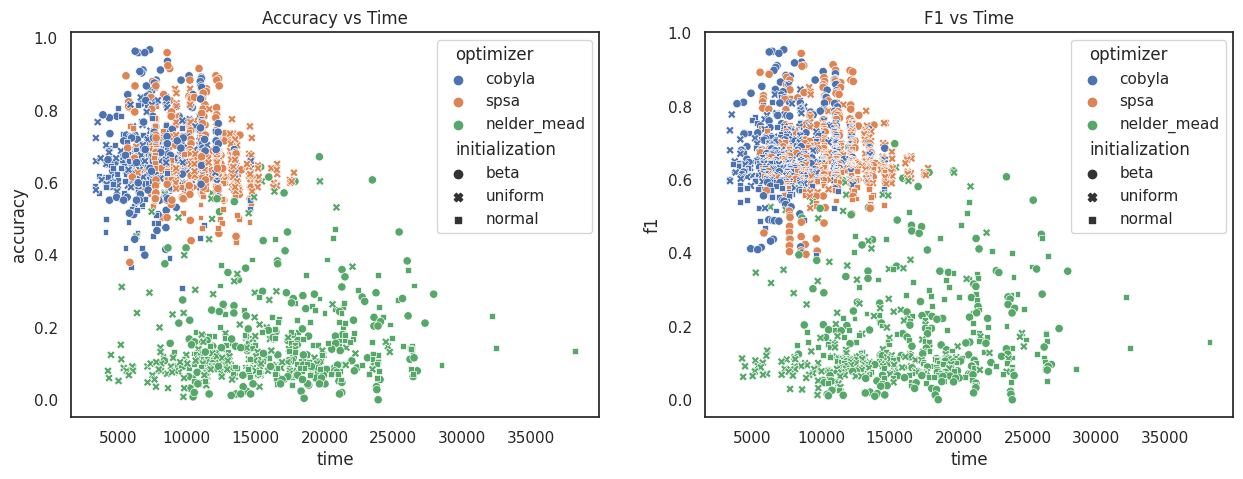

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='optimizer', style='initialization', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='optimizer', style='initialization', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [59]:
cob_runtime = res[res['optimizer']=='cobyla'].set_index(index).sort_index()['time']
spsa_runtime = res[res['optimizer']=='spsa'].set_index(index).sort_index()['time']
nelder_runtime = res[res['optimizer']=='nelder_mead'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", kruskal(cob_runtime, spsa_runtime, nelder_runtime).pvalue < 0.05)

print("COBYLA significantly shorter than SPSA", wilcoxon(cob_runtime, spsa_runtime, alternative='less').pvalue < 0.05)
print("COBYLA significantly shorter than Nelder-Mead", wilcoxon(cob_runtime, nelder_runtime, alternative='less').pvalue < 0.05)
print("SPSA significantly shorter than Nelder-Mead", wilcoxon(spsa_runtime, nelder_runtime, alternative='less').pvalue < 0.05)

Significant Differences: True
COBYLA significantly shorter than SPSA True
COBYLA significantly shorter than Nelder-Mead True
SPSA significantly shorter than Nelder-Mead True


### Ansatz

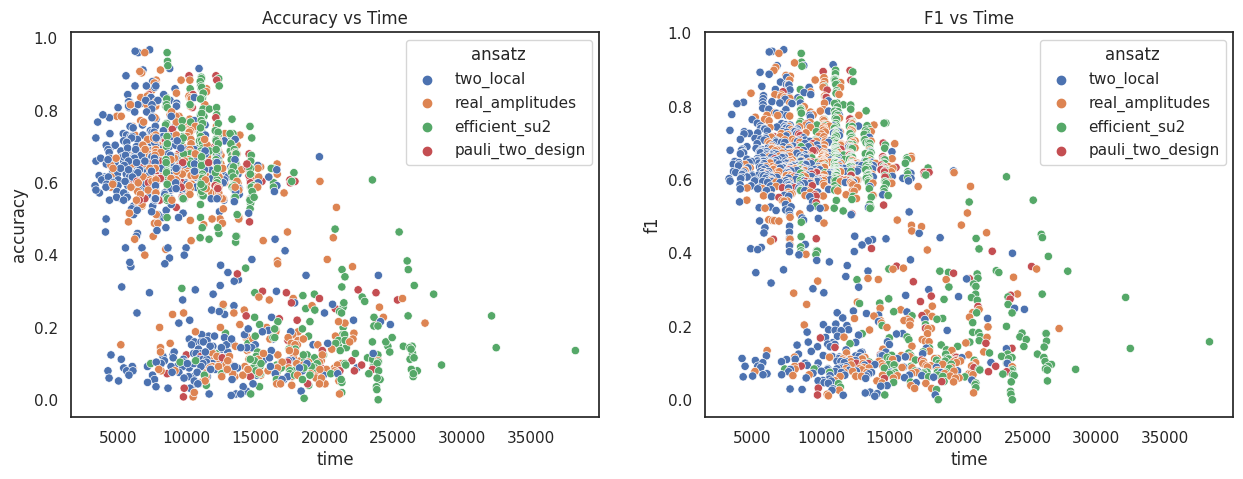

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='ansatz', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='ansatz', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [61]:
eff_runtime = res[res['ansatz']=='efficient_su2']['time']
pauli_runtime = res[res['ansatz']=='pauli_two_design']['time']
real_runtime = res[res['ansatz']=='real_amplitudes']['time']
two_runtime = res[res['ansatz']=='two_local']['time']

# significant differences in runtime
print("Significant Differences:", kruskal(eff_runtime, pauli_runtime, real_runtime, two_runtime).pvalue < 0.05)

for ansatz in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
    for ansatz2 in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
        if ansatz != ansatz2:
            sign = mannwhitneyu(res[res['ansatz']==ansatz]['time'], res[res['ansatz']==ansatz2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{ansatz}: significantly shorter than {ansatz2}", sign)

Significant Differences: True
pauli_two_design: significantly shorter than efficient_su2 True
real_amplitudes: significantly shorter than efficient_su2 True
real_amplitudes: significantly shorter than pauli_two_design True
two_local: significantly shorter than efficient_su2 True
two_local: significantly shorter than pauli_two_design True
two_local: significantly shorter than real_amplitudes True


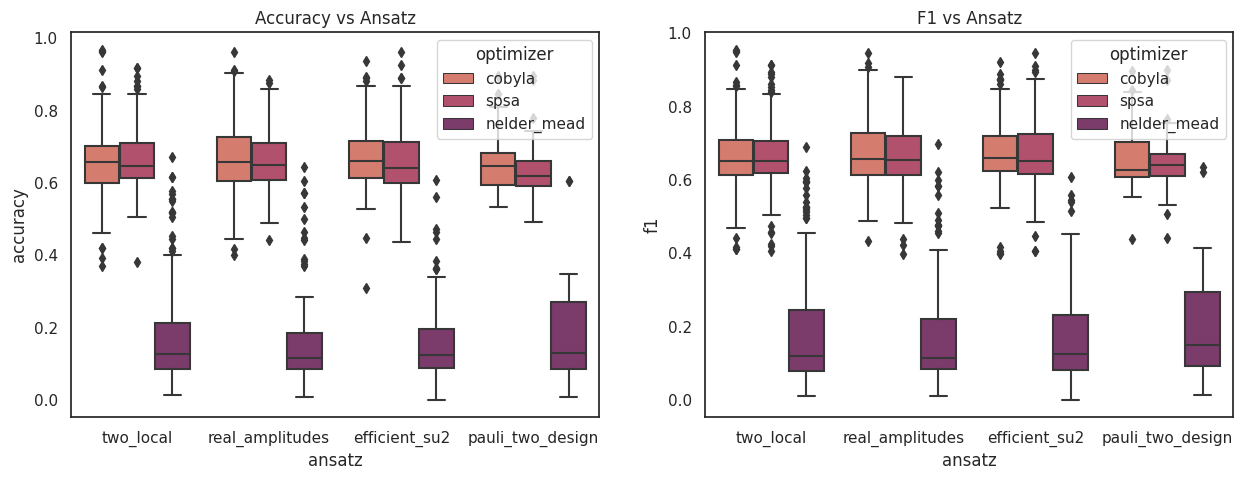

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='ansatz', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='ansatz', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Ansatz')
ax[1].set_title('F1 vs Ansatz')
plt.show()

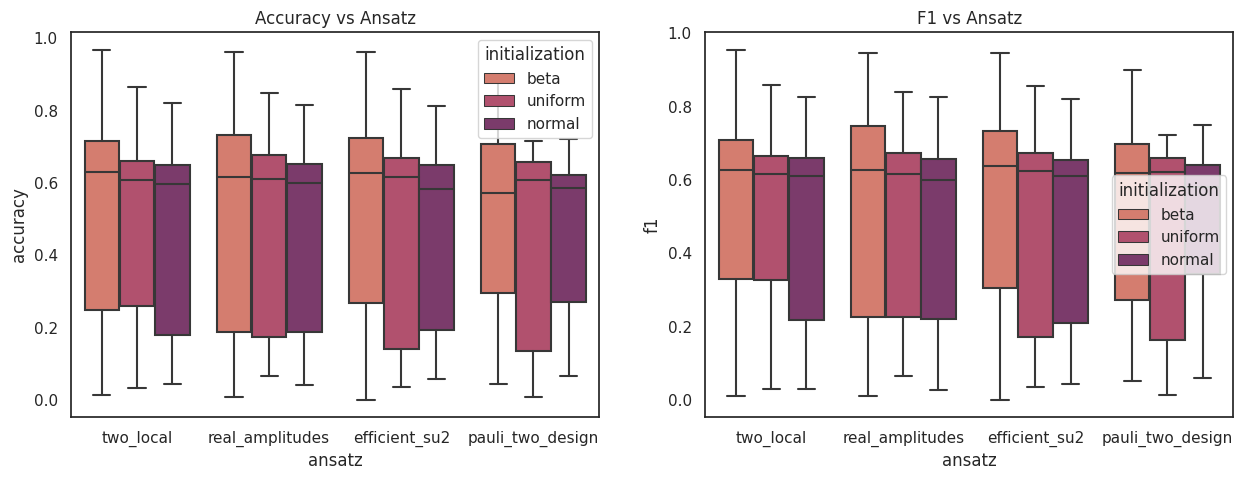

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='ansatz', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='ansatz', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Ansatz')
ax[1].set_title('F1 vs Ansatz')
plt.show()

### FeatureMap

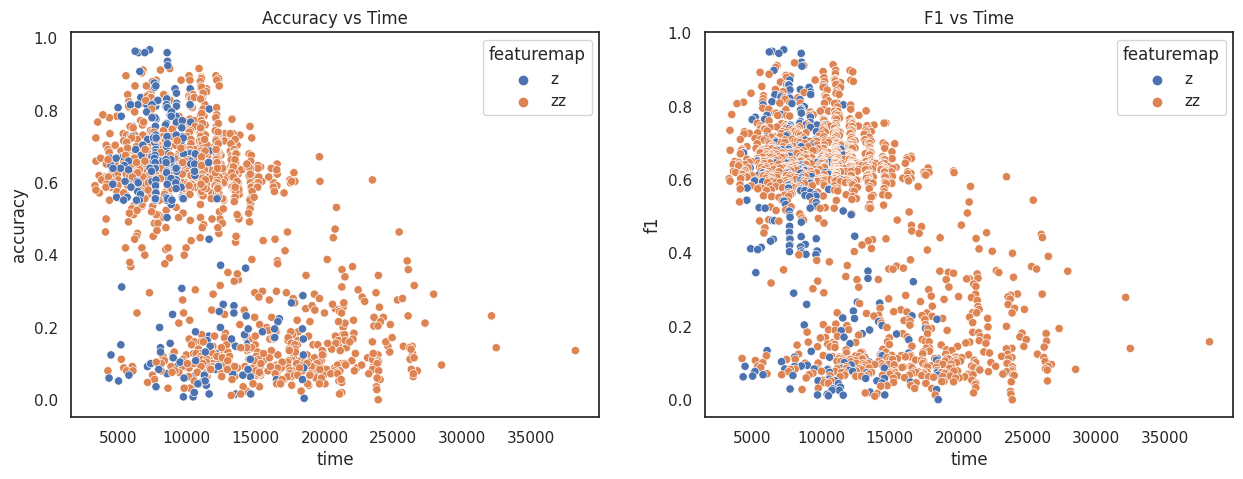

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='featuremap', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='featuremap', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [65]:
z_runtime = res[res['featuremap']=='z']['time']
zz_runtime = res[res['featuremap']=='zz']['time']

# significant differences in runtime
print("Z significantly shorter than ZZFeatureMap:", mannwhitneyu(z_runtime, zz_runtime, alternative='less').pvalue < 0.05)

Z significantly shorter than ZZFeatureMap: True


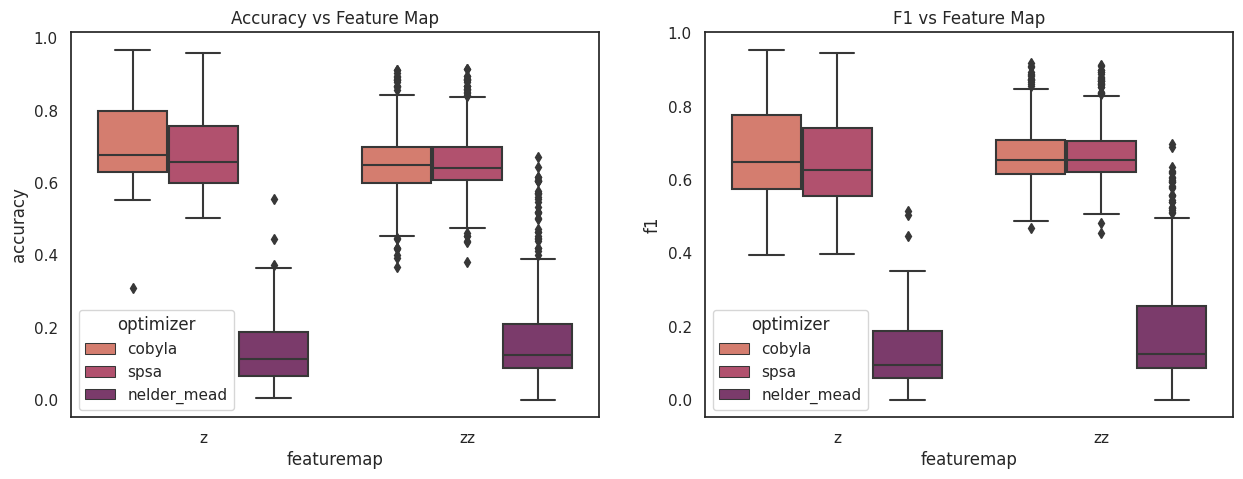

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='featuremap', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='featuremap', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map')
ax[1].set_title('F1 vs Feature Map')
plt.show()

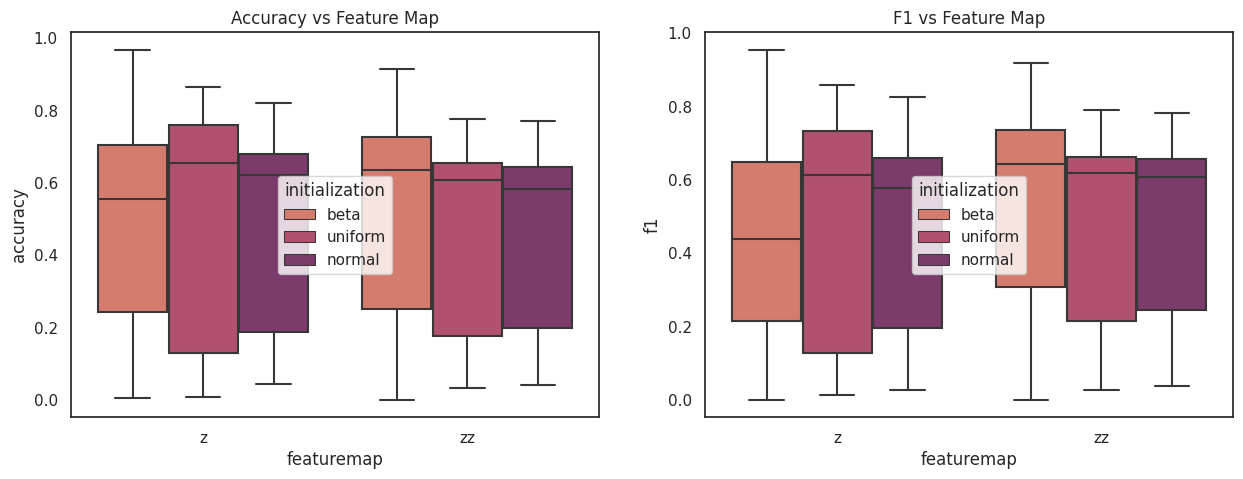

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='featuremap', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='featuremap', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map')
ax[1].set_title('F1 vs Feature Map')
plt.show()

### Ansatz Entanglement

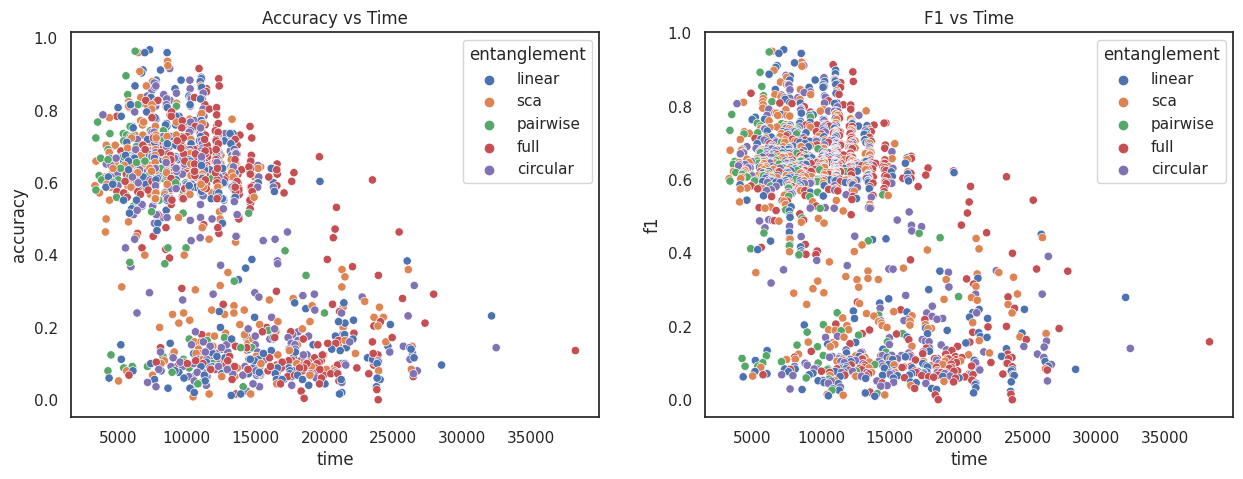

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='entanglement', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='entanglement', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [69]:
sca_runtime = res[res['entanglement']=='sca']['time']
full_runtime = res[res['entanglement']=='full']['time']
circular_runtime = res[res['entanglement']=='circular']['time']
linear_runtime = res[res['entanglement']=='linear']['time']
pairwise_runtime = res[res['entanglement']=='pairwise']['time']

# significant differences in runtime
print("Significant Differences:", kruskal(sca_runtime, full_runtime, circular_runtime, linear_runtime, pairwise_runtime).pvalue < 0.05)

for entanglement1 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
    for entanglement2 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
        if entanglement1 != entanglement2:
            sign = mannwhitneyu(res[res['entanglement']==entanglement1]['time'], res[res['entanglement']==entanglement2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{entanglement1}: significantly shorter than {entanglement2}", sign)

Significant Differences: True
sca: significantly shorter than full True
sca: significantly shorter than linear True
circular: significantly shorter than full True
linear: significantly shorter than full True
pairwise: significantly shorter than sca True
pairwise: significantly shorter than full True
pairwise: significantly shorter than circular True
pairwise: significantly shorter than linear True


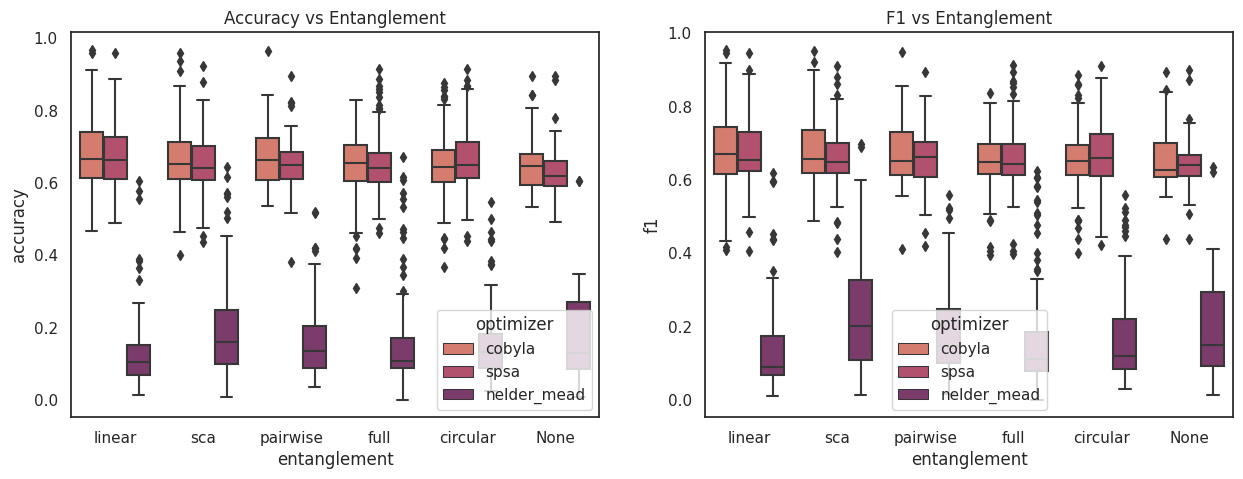

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Entanglement')
ax[1].set_title('F1 vs Entanglement')
plt.show()

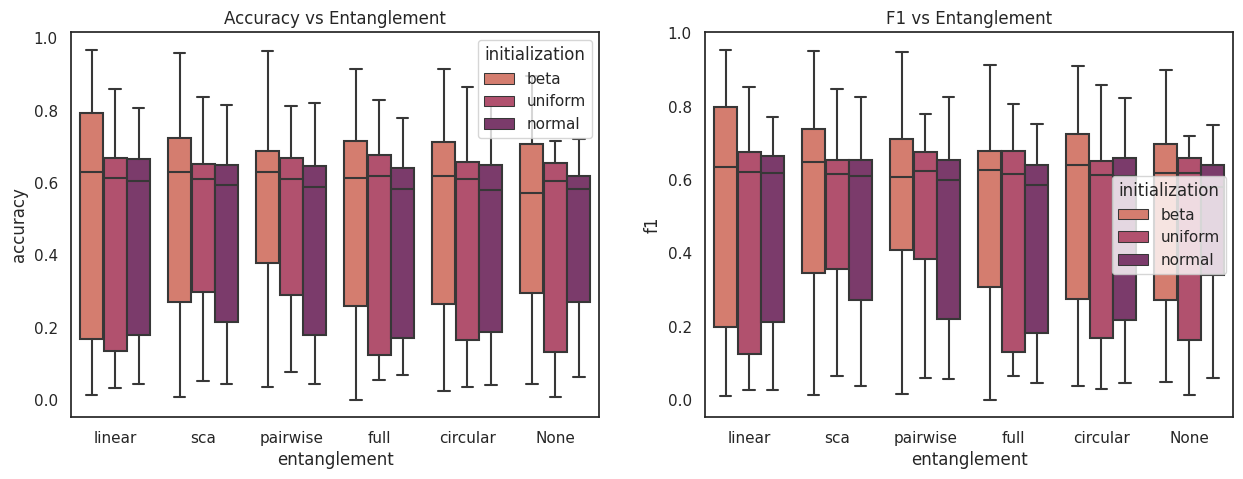

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Entanglement')
ax[1].set_title('F1 vs Entanglement')
plt.show()

### FeatureMap Entanglement

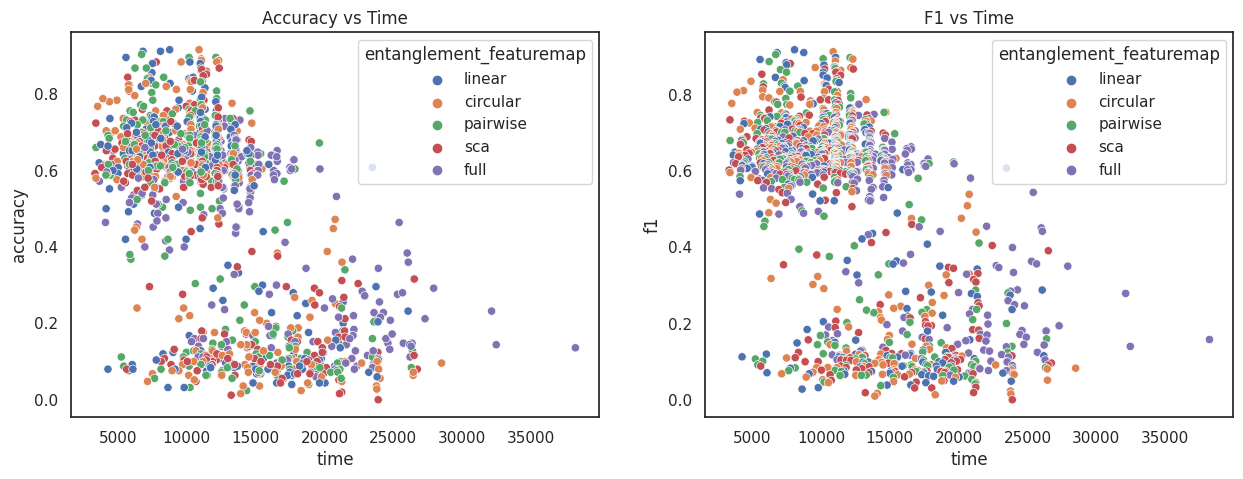

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='entanglement_featuremap', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='entanglement_featuremap', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [73]:
sca_runtime = res[res['entanglement_featuremap']=='sca'].set_index(index).sort_index()['time']
full_runtime = res[res['entanglement_featuremap']=='full'].set_index(index).sort_index()['time']
circular_runtime = res[res['entanglement_featuremap']=='circular'].set_index(index).sort_index()['time']
linear_runtime = res[res['entanglement_featuremap']=='linear'].set_index(index).sort_index()['time']
pairwise_runtime = res[res['entanglement_featuremap']=='pairwise'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", friedmanchisquare(sca_runtime, full_runtime, circular_runtime, linear_runtime, pairwise_runtime).pvalue < 0.05)

for entanglement1 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
    for entanglement2 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
        if entanglement1 != entanglement2:
            sign = wilcoxon(res[res['entanglement_featuremap']==entanglement1]['time'], res[res['entanglement_featuremap']==entanglement2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{entanglement1}: significantly shorter than {entanglement2}", sign)

Significant Differences: True
sca: significantly shorter than full True
circular: significantly shorter than full True
linear: significantly shorter than full True
pairwise: significantly shorter than full True


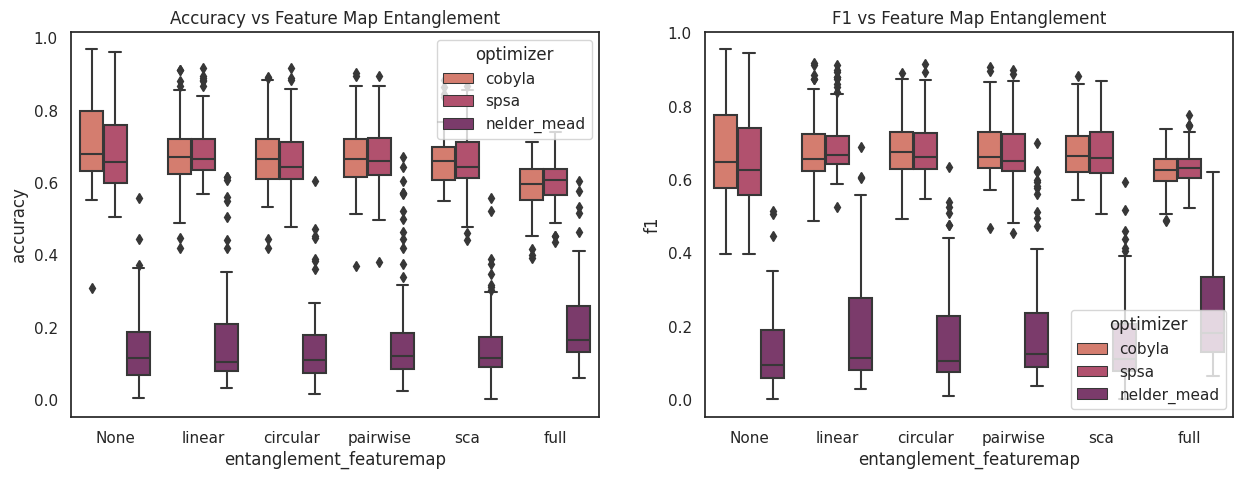

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement_featuremap', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map Entanglement')
ax[1].set_title('F1 vs Feature Map Entanglement')
plt.show()


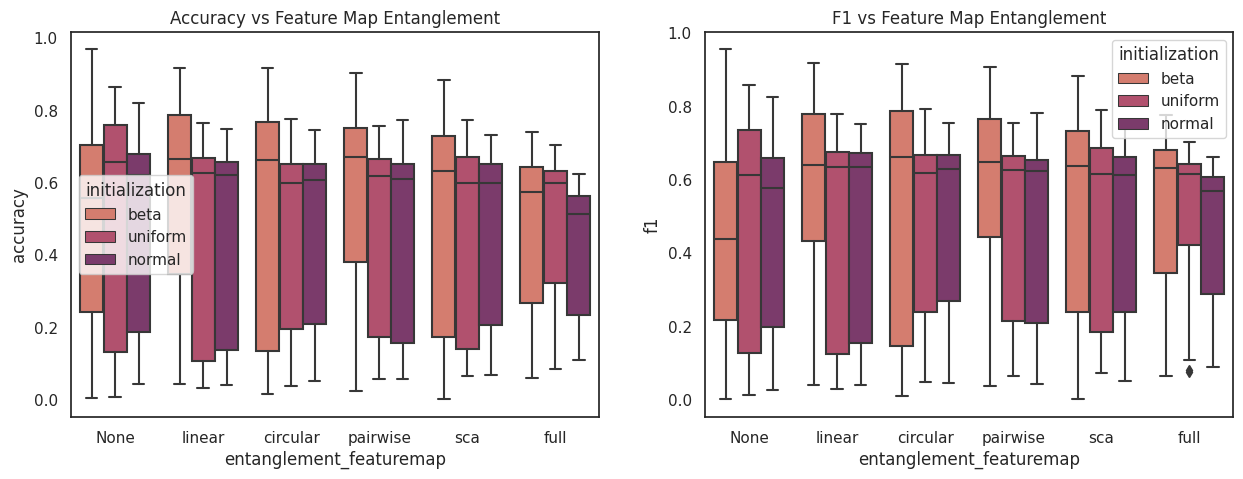

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement_featuremap', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map Entanglement')
ax[1].set_title('F1 vs Feature Map Entanglement')
plt.show()


### Preprocessing

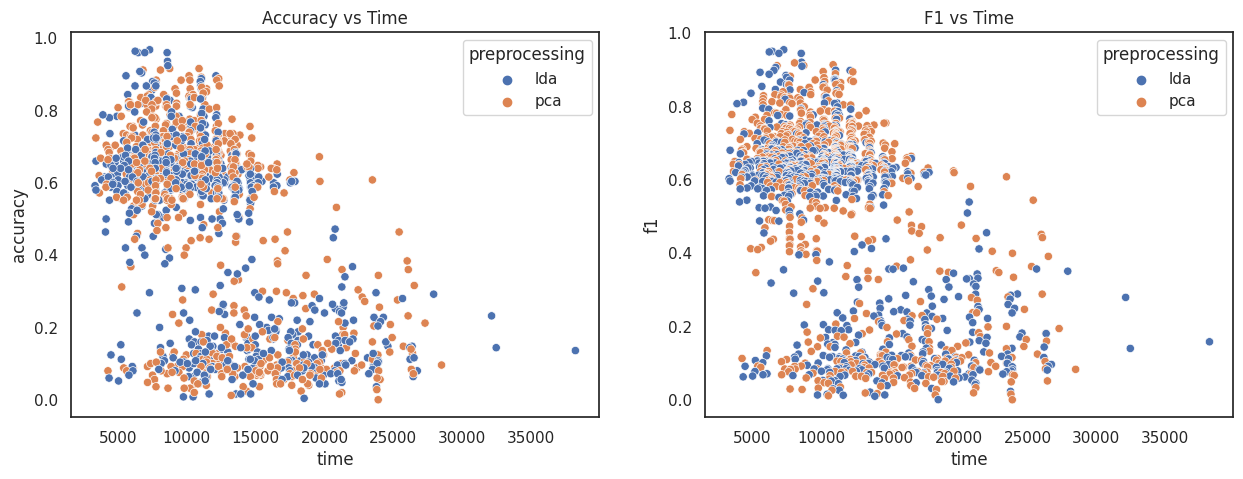

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='preprocessing', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='preprocessing', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [77]:
pca_runtime = res[res['preprocessing']=='pca'].set_index(index).sort_index()['time']
lda_runtime = res[res['preprocessing']=='lda'].set_index(index).sort_index()['time']

# significant differences in runtime
print("PCA significantly different from LDA:", wilcoxon(pca_runtime, lda_runtime).pvalue < 0.05)

PCA significantly different from LDA: False


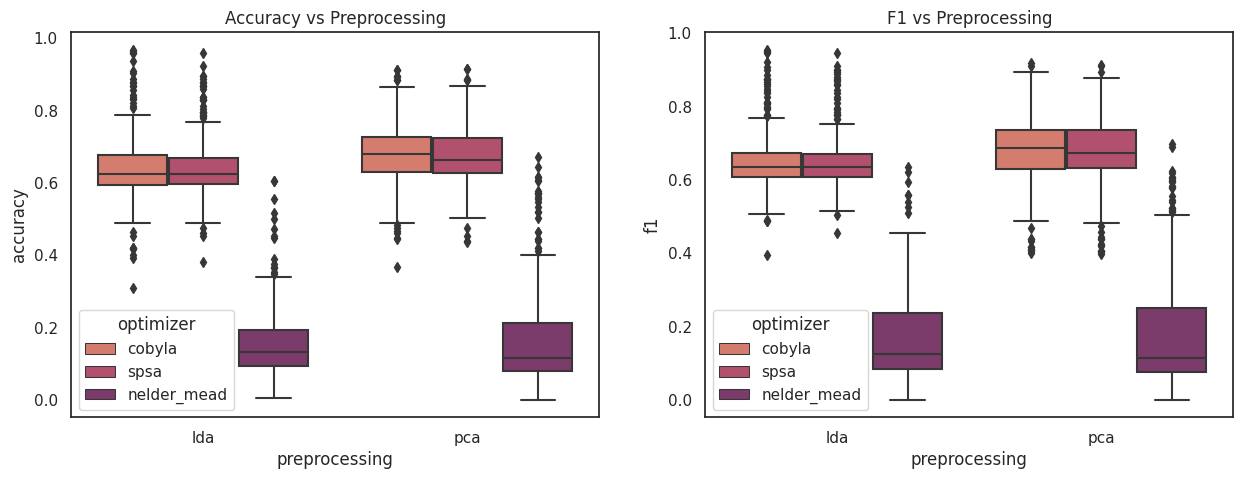

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='preprocessing', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='preprocessing', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Preprocessing')
ax[1].set_title('F1 vs Preprocessing')
plt.show()

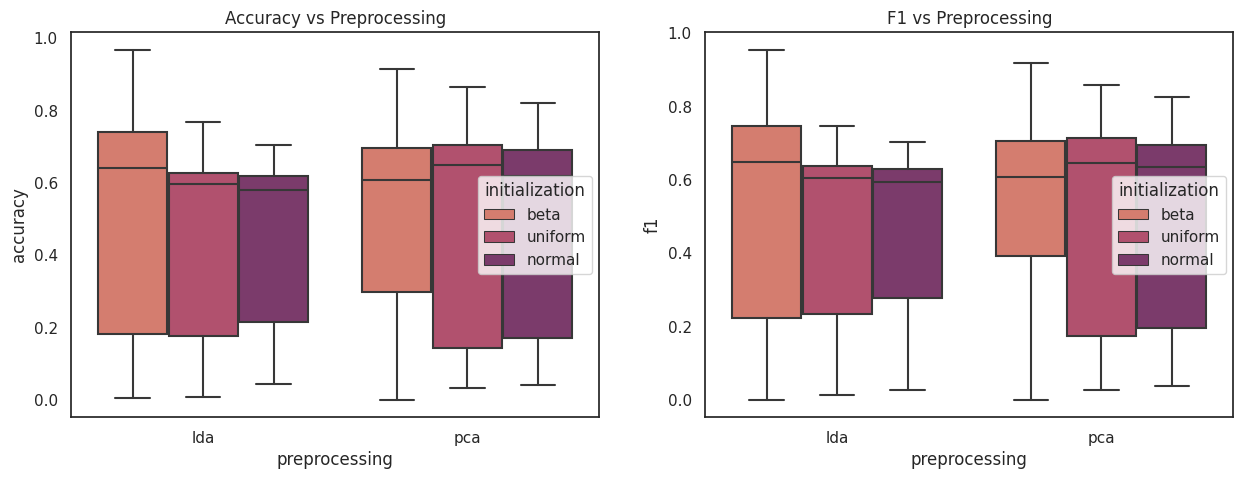

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='preprocessing', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='preprocessing', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Preprocessing')
ax[1].set_title('F1 vs Preprocessing')
plt.show()

### Initialization

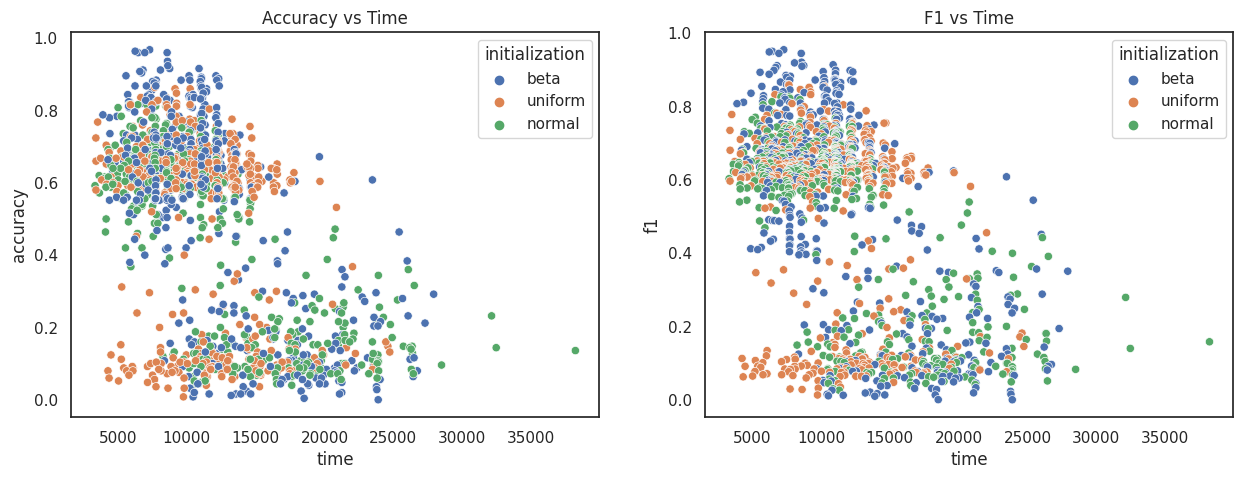

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='initialization', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='initialization', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [81]:
beta = res[res['initialization']=='beta'].set_index(index).sort_index()['time']
normal = res[res['initialization']=='normal'].set_index(index).sort_index()['time']
uniform = res[res['initialization']=='uniform'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", friedmanchisquare(beta, normal, uniform).pvalue < 0.05)

print("Uniform significantly shorter than beta:", wilcoxon(uniform, beta, alternative='less').pvalue < 0.05)
print("Uniform significantly shorter than normal:", wilcoxon(uniform, normal, alternative='less').pvalue < 0.05)
print("Normal significantly shorter than beta:", wilcoxon(normal, beta, alternative='less').pvalue < 0.05)

Significant Differences: True
Uniform significantly shorter than beta: True
Uniform significantly shorter than normal: True
Normal significantly shorter than beta: True


In [82]:
res.groupby(['optimizer', 'initialization'])[['iterations', 'time']].mean()

iterations          time
optimizer   initialization                          
cobyla      beta            207.625000   8434.956840
            normal          197.279762   8064.074242
            uniform         210.232143   8570.857679
nelder_mead beta            428.369048  17356.938759
            normal          444.922619  18129.474718
            uniform         308.250000  12727.991479
spsa        beta            251.000000  10114.062385
            normal          251.000000  10073.929736
            uniform         301.000000  12180.678228

## Plot multiple variables

In [83]:
r = res_better.copy()
# replace all None with 'None'
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'

### Time vs. Hyperparameters

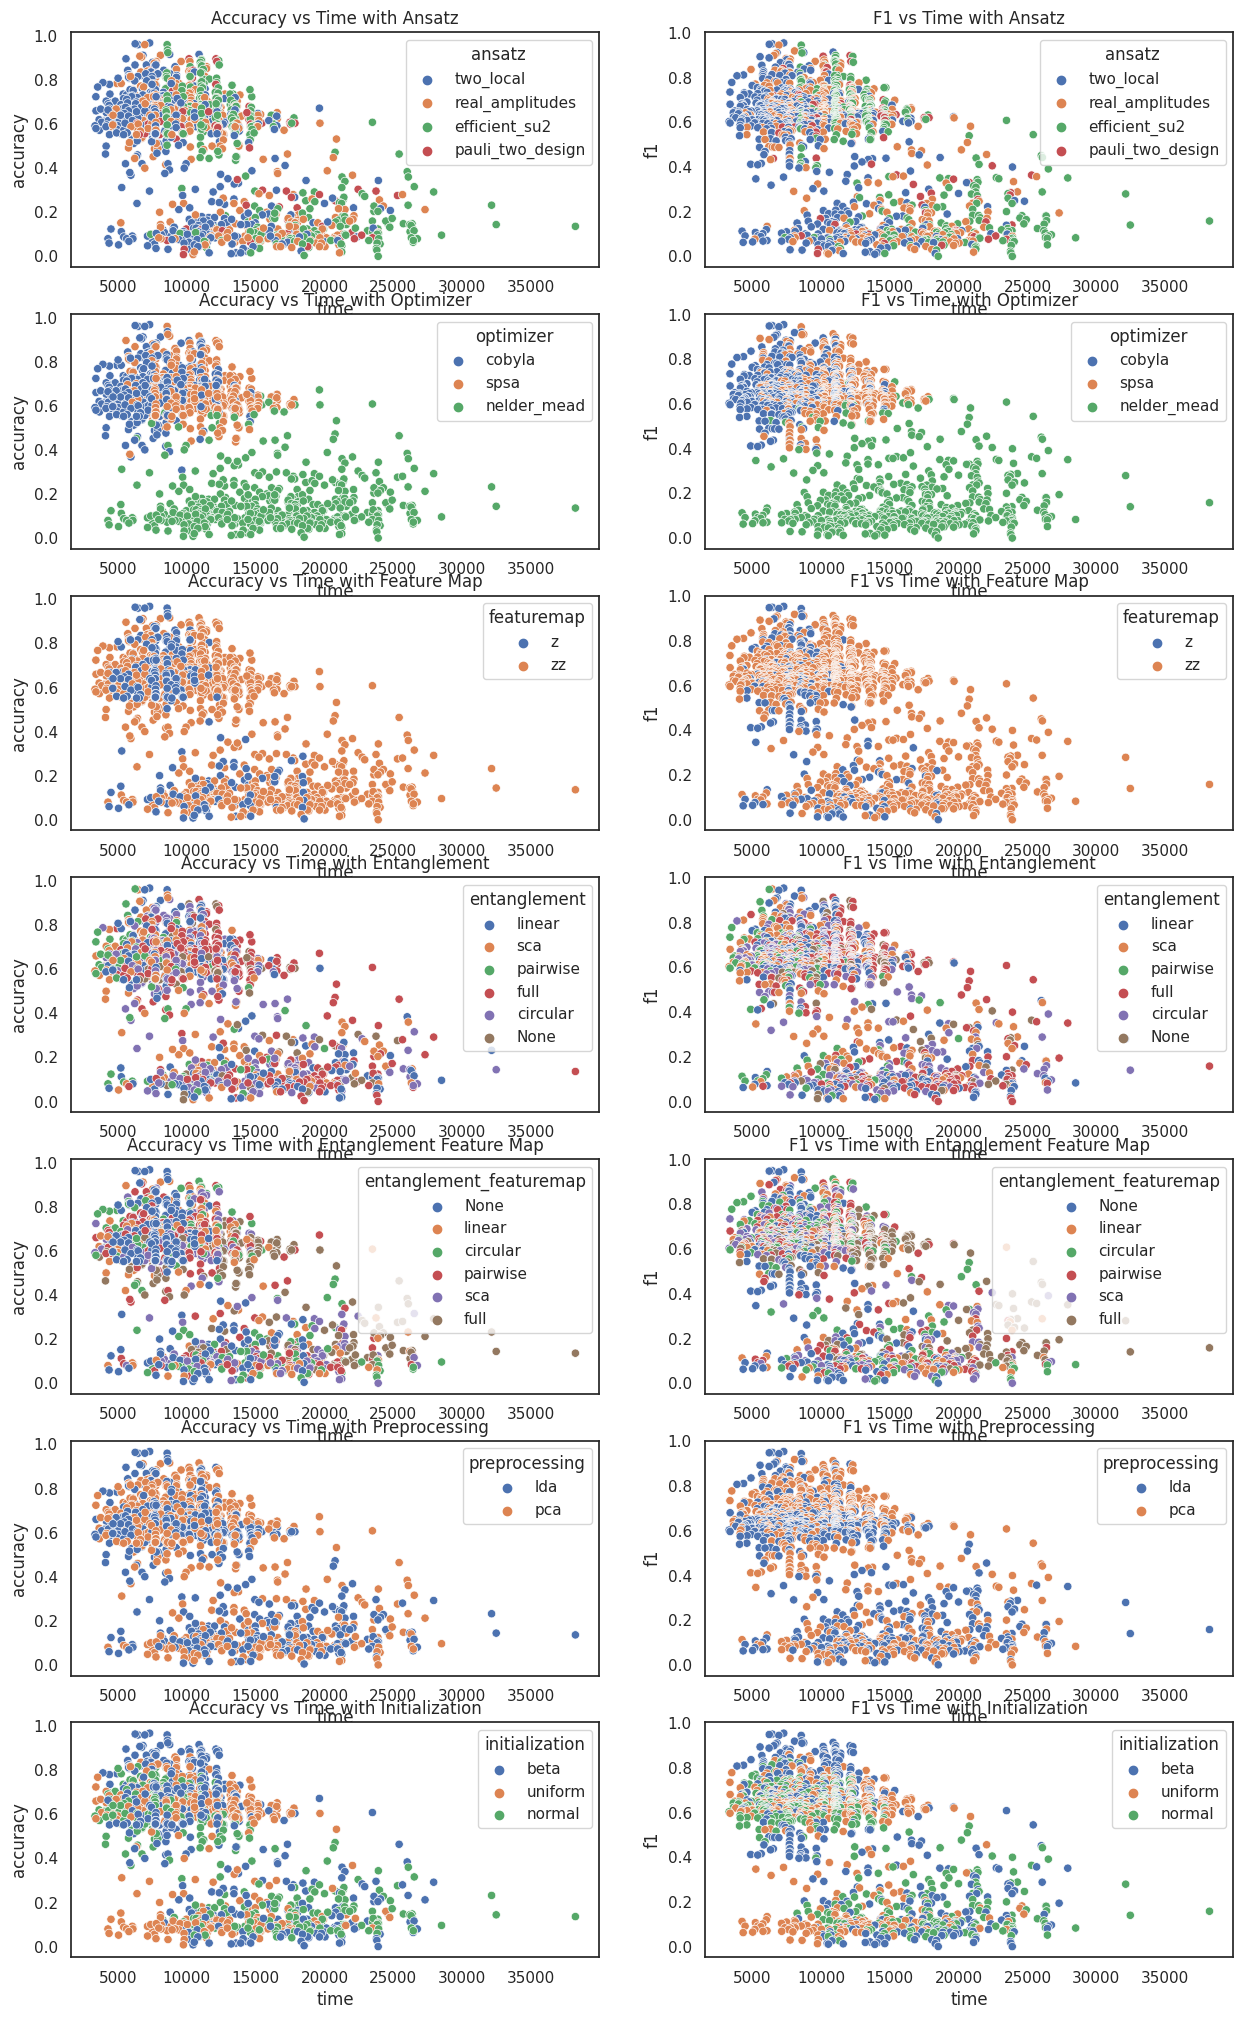

In [84]:
fig, ax = plt.subplots(7, 2, figsize=(15, 25))
sns.scatterplot(data=r, x='time', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='featuremap', palette='deep', ax=ax[2, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='featuremap', palette='deep', ax=ax[2, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='entanglement', palette='deep', ax=ax[3, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='entanglement', palette='deep', ax=ax[3, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[4, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='entanglement_featuremap', palette='deep', ax=ax[4, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='preprocessing', palette='deep', ax=ax[5, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='preprocessing', palette='deep', ax=ax[5, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='initialization', palette='deep', ax=ax[6, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='initialization', palette='deep', ax=ax[6, 1])
ax[0, 0].set_title('Accuracy vs Time with Ansatz')
ax[0, 1].set_title('F1 vs Time with Ansatz')
ax[2, 0].set_title('Accuracy vs Time with Feature Map')
ax[2, 1].set_title('F1 vs Time with Feature Map')
ax[3, 0].set_title('Accuracy vs Time with Entanglement')
ax[3, 1].set_title('F1 vs Time with Entanglement')
ax[4, 0].set_title('Accuracy vs Time with Entanglement Feature Map')
ax[4, 1].set_title('F1 vs Time with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Time with Optimizer')
ax[1, 1].set_title('F1 vs Time with Optimizer')
ax[5, 0].set_title('Accuracy vs Time with Preprocessing')
ax[5, 1].set_title('F1 vs Time with Preprocessing')
ax[6, 0].set_title('Accuracy vs Time with Initialization')
ax[6, 1].set_title('F1 vs Time with Initialization')
plt.show()

### Ansatz vs Accuracy/Time and additional parameters

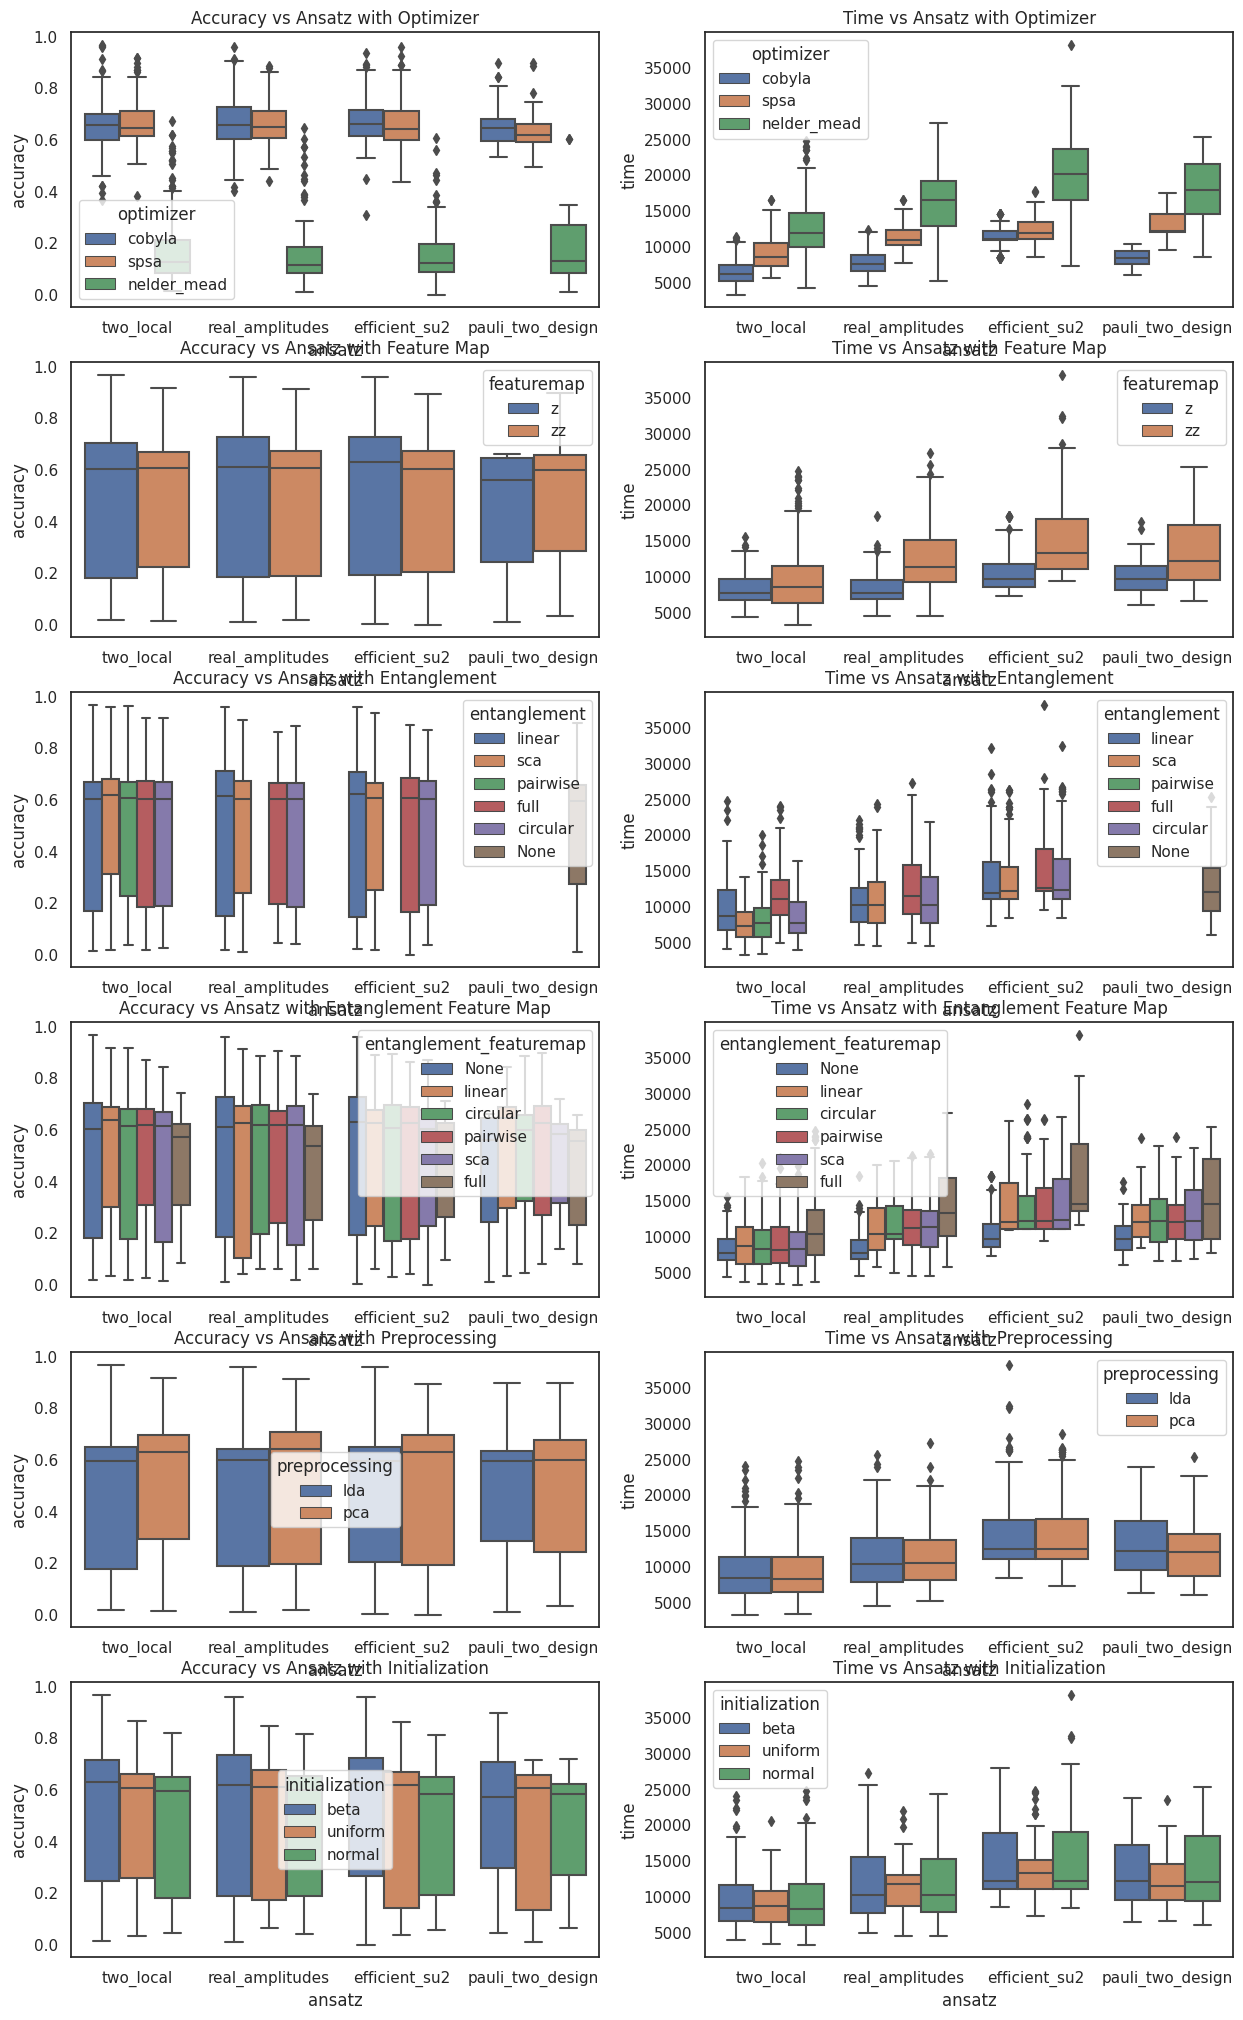

In [85]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='featuremap', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='featuremap', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='optimizer', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='optimizer', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[1, 0].set_title('Accuracy vs Ansatz with Feature Map')
ax[1, 1].set_title('Time vs Ansatz with Feature Map')
ax[2, 0].set_title('Accuracy vs Ansatz with Entanglement')
ax[2, 1].set_title('Time vs Ansatz with Entanglement')
ax[3, 0].set_title('Accuracy vs Ansatz with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Ansatz with Entanglement Feature Map')
ax[0, 0].set_title('Accuracy vs Ansatz with Optimizer')
ax[0, 1].set_title('Time vs Ansatz with Optimizer')
ax[4, 0].set_title('Accuracy vs Ansatz with Preprocessing')
ax[4, 1].set_title('Time vs Ansatz with Preprocessing')
ax[5, 0].set_title('Accuracy vs Ansatz with Initialization')
ax[5, 1].set_title('Time vs Ansatz with Initialization')
plt.show()


### FeatureMap vs. Accuracy/Time and additional parameters

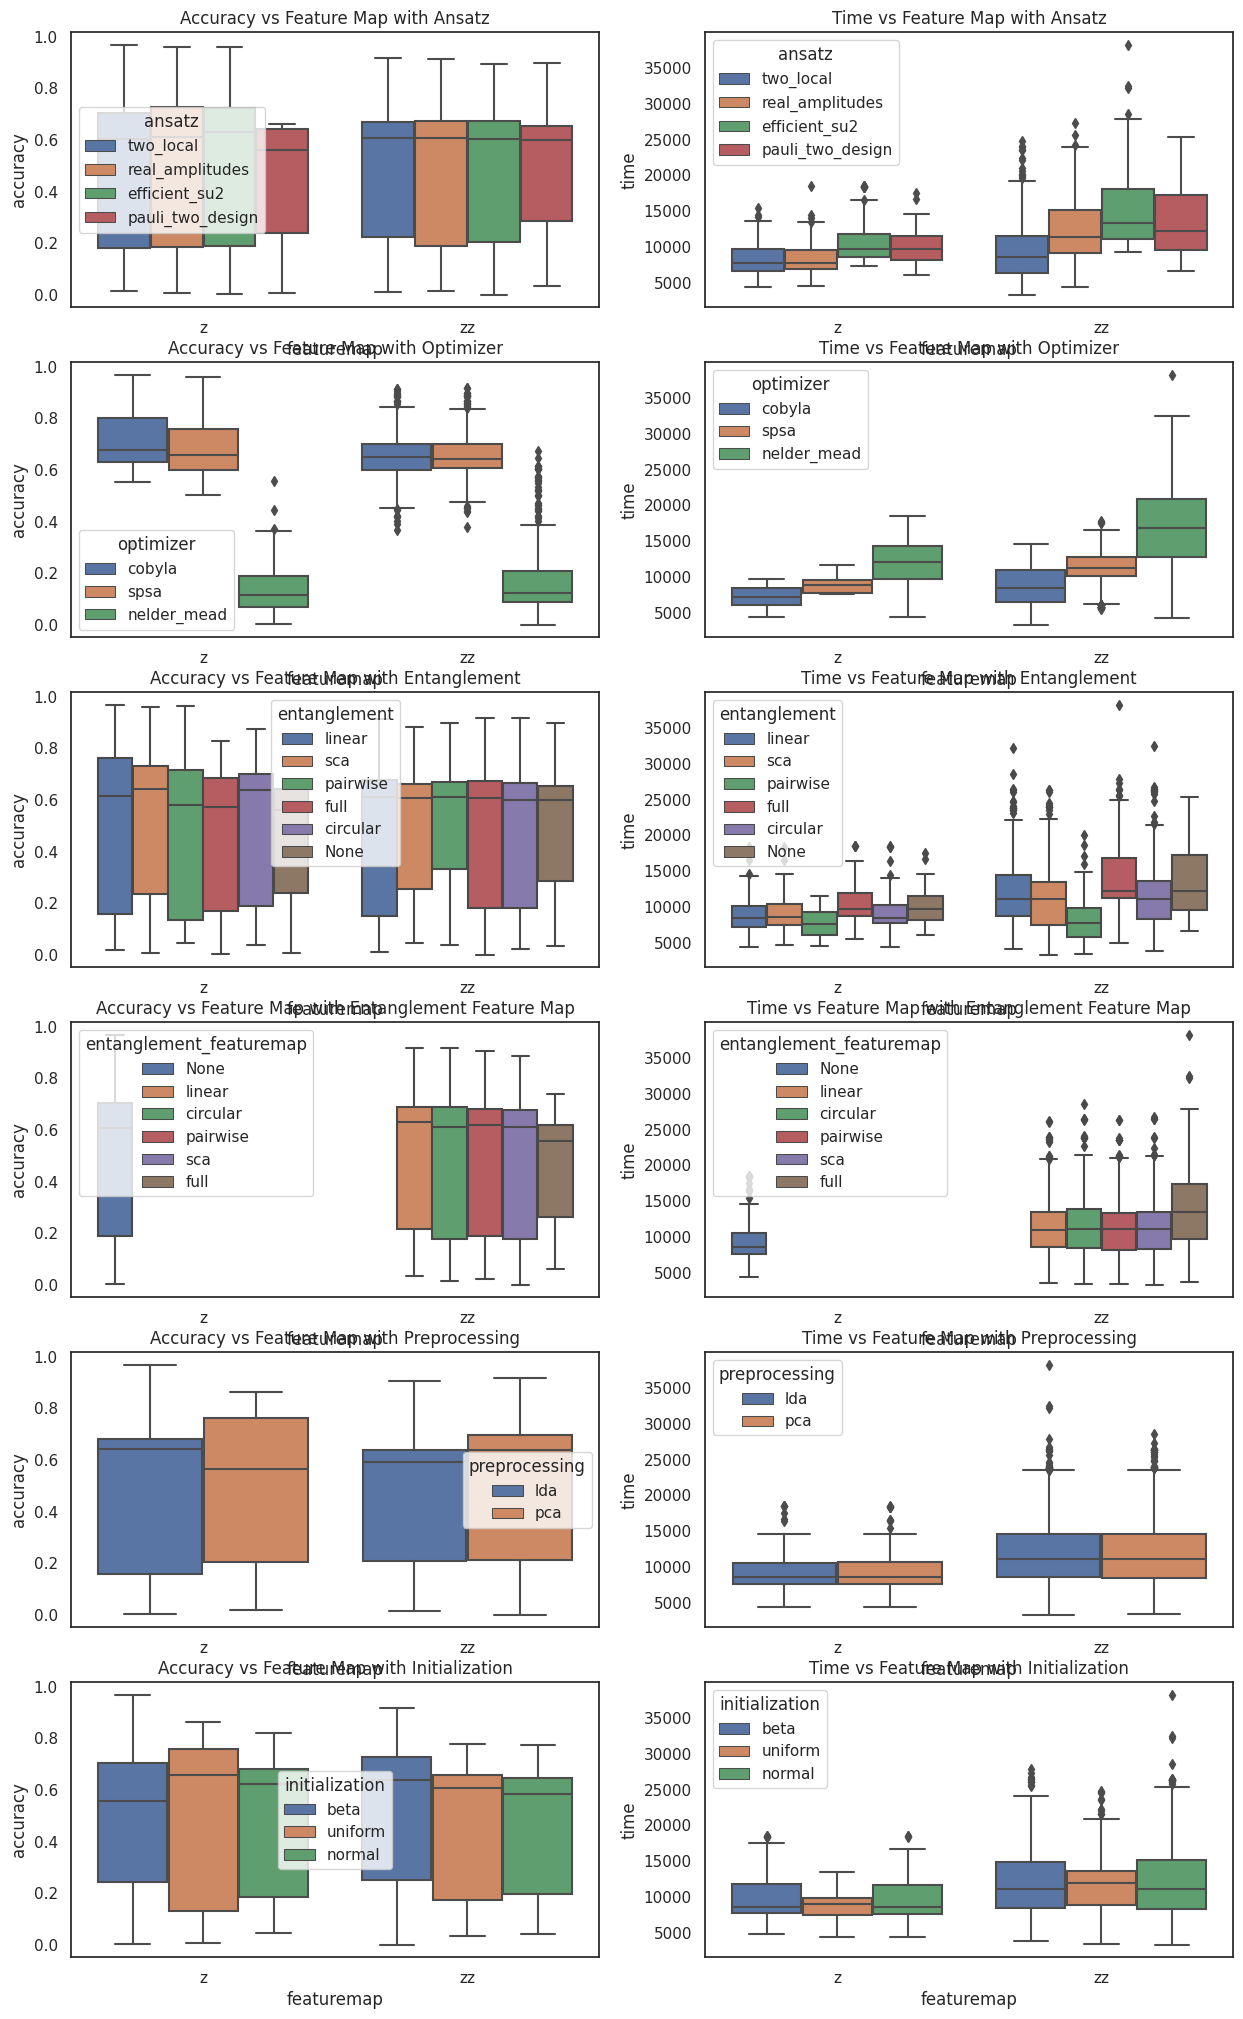

In [86]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Feature Map with Ansatz')
ax[0, 1].set_title('Time vs Feature Map with Ansatz')
ax[2, 0].set_title('Accuracy vs Feature Map with Entanglement')
ax[2, 1].set_title('Time vs Feature Map with Entanglement')
ax[3, 0].set_title('Accuracy vs Feature Map with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Feature Map with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Feature Map with Optimizer')
ax[1, 1].set_title('Time vs Feature Map with Optimizer')
ax[4, 0].set_title('Accuracy vs Feature Map with Preprocessing')
ax[4, 1].set_title('Time vs Feature Map with Preprocessing')
ax[5, 0].set_title('Accuracy vs Feature Map with Initialization')
ax[5, 1].set_title('Time vs Feature Map with Initialization')
plt.show()

### Entanglement vs Accuracy/Time and additional parameters

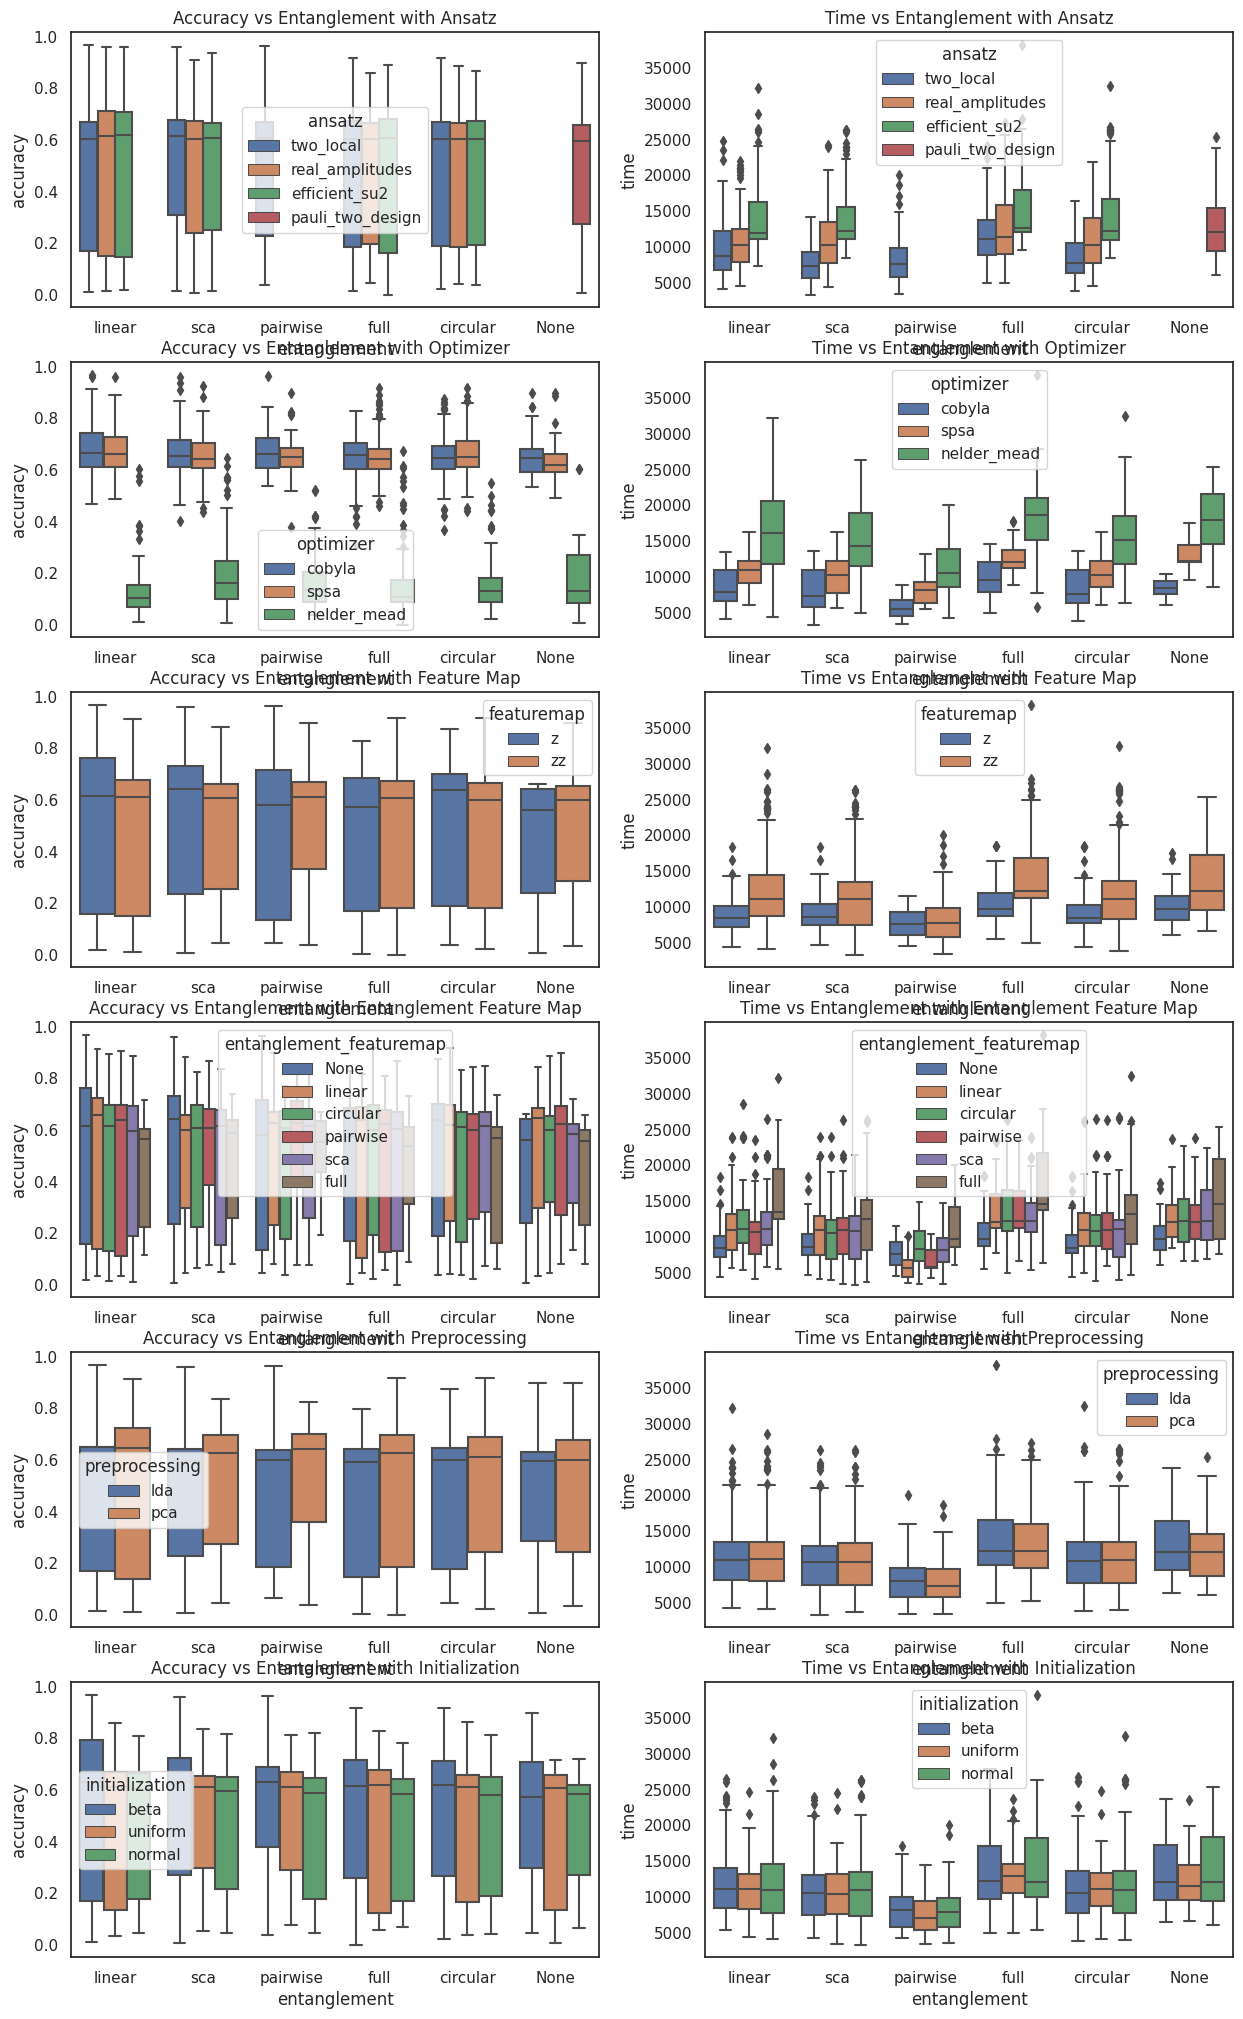

In [87]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='featuremap', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='featuremap', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Entanglement with Ansatz')
ax[0, 1].set_title('Time vs Entanglement with Ansatz')
ax[2, 0].set_title('Accuracy vs Entanglement with Feature Map')
ax[2, 1].set_title('Time vs Entanglement with Feature Map')
ax[3, 0].set_title('Accuracy vs Entanglement with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Entanglement with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Entanglement with Optimizer')
ax[1, 1].set_title('Time vs Entanglement with Optimizer')
ax[4, 0].set_title('Accuracy vs Entanglement with Preprocessing')
ax[4, 1].set_title('Time vs Entanglement with Preprocessing')
ax[5, 0].set_title('Accuracy vs Entanglement with Initialization')
ax[5, 1].set_title('Time vs Entanglement with Initialization')
plt.show()


### FeatureMap Entanglement vs. Accuracy/Time and additional parameters

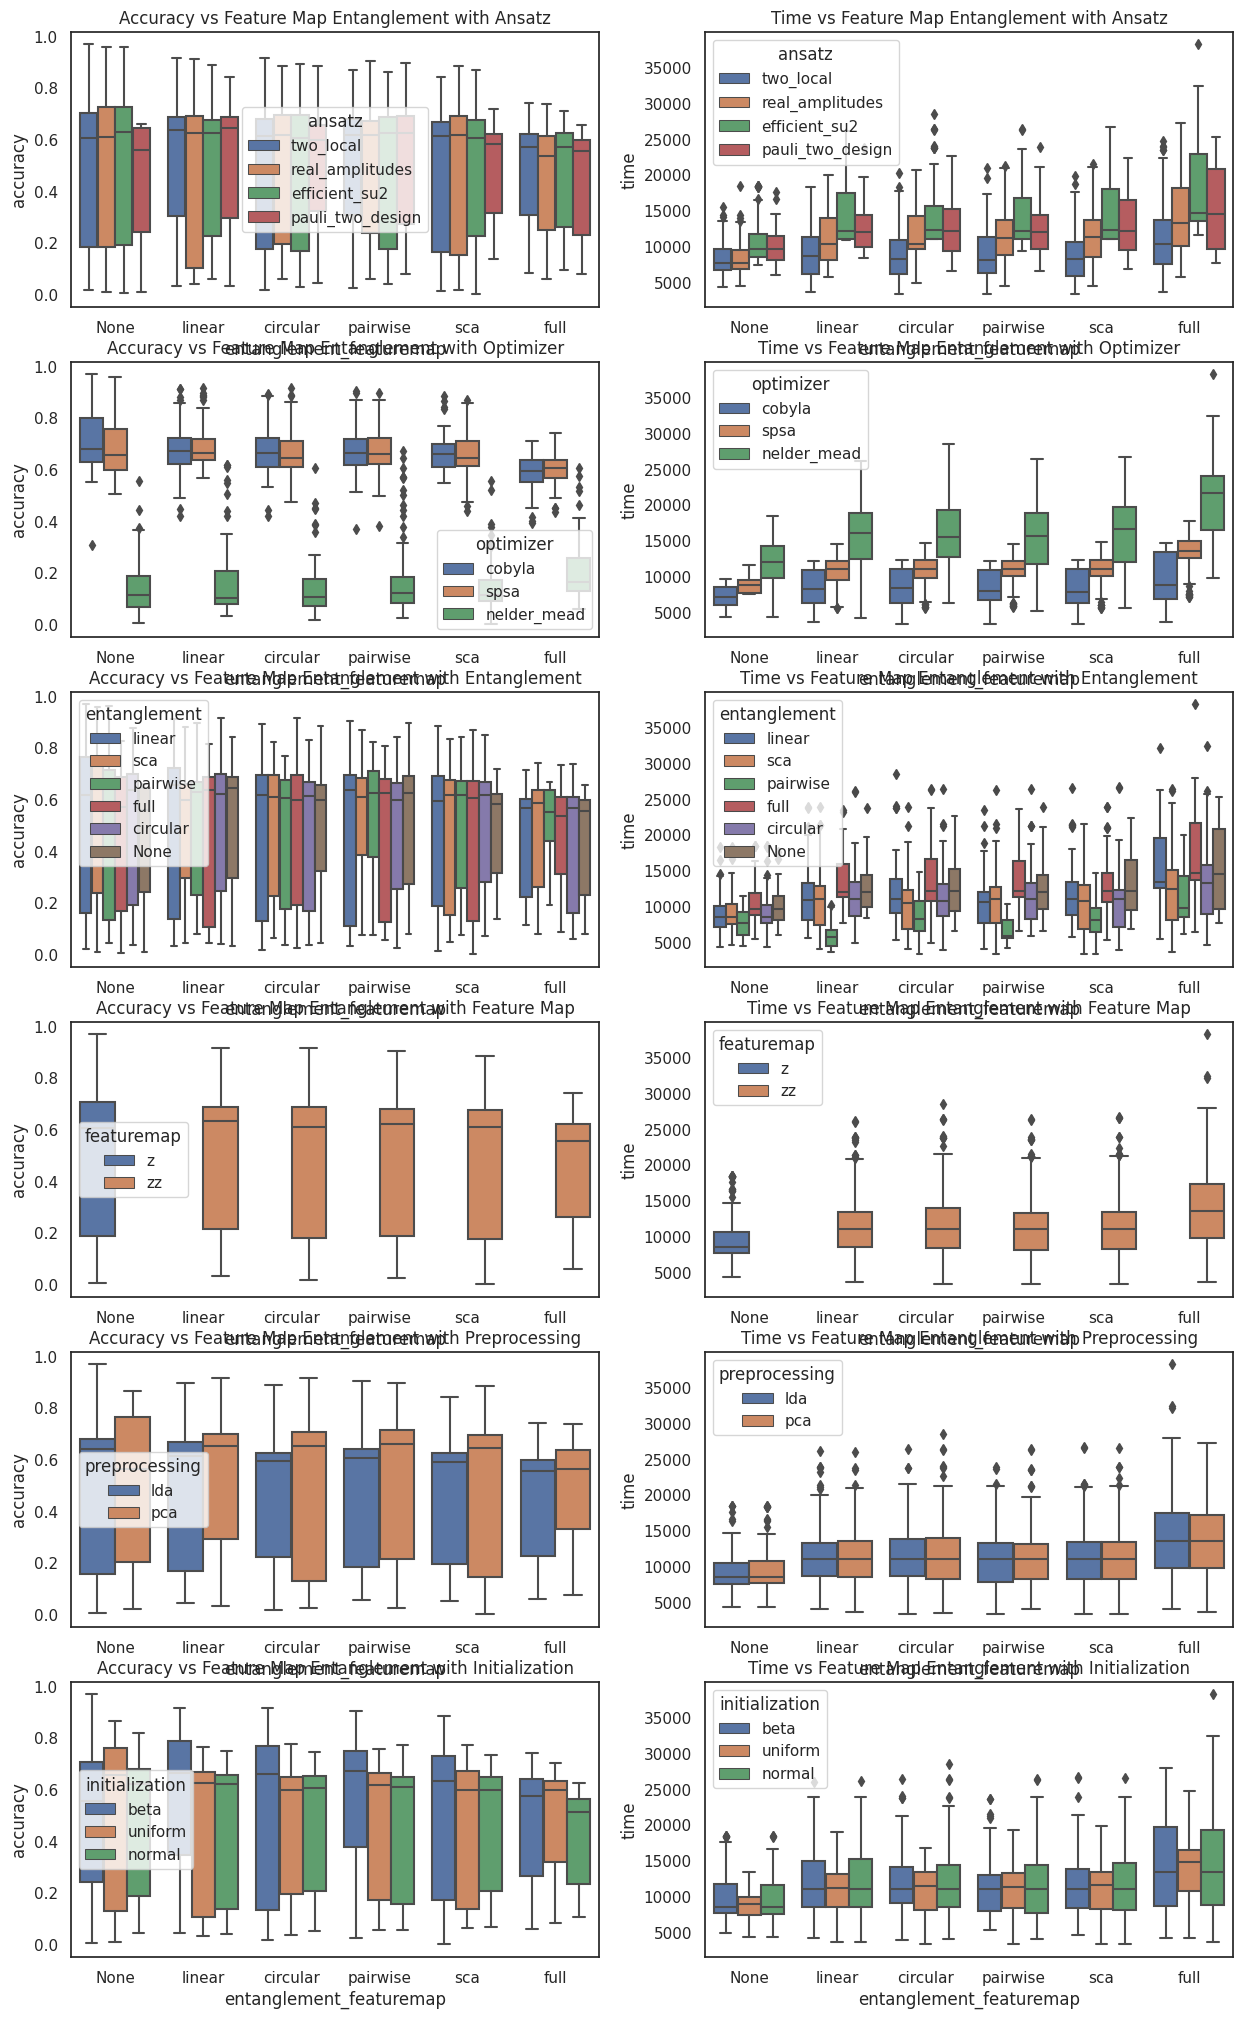

In [88]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Feature Map Entanglement with Ansatz')
ax[0, 1].set_title('Time vs Feature Map Entanglement with Ansatz')
ax[2, 0].set_title('Accuracy vs Feature Map Entanglement with Entanglement')
ax[2, 1].set_title('Time vs Feature Map Entanglement with Entanglement')
ax[3, 0].set_title('Accuracy vs Feature Map Entanglement with Feature Map')
ax[3, 1].set_title('Time vs Feature Map Entanglement with Feature Map')
ax[1, 0].set_title('Accuracy vs Feature Map Entanglement with Optimizer')
ax[1, 1].set_title('Time vs Feature Map Entanglement with Optimizer')
ax[4, 0].set_title('Accuracy vs Feature Map Entanglement with Preprocessing')
ax[4, 1].set_title('Time vs Feature Map Entanglement with Preprocessing')
ax[5, 0].set_title('Accuracy vs Feature Map Entanglement with Initialization')
ax[5, 1].set_title('Time vs Feature Map Entanglement with Initialization')
plt.show()

## Analyze Worst
* Only Nelson-Mead and (few) SPSA configurations
* A lot of ZFeatureMap, compared to ZZ
* More LDA than PCA ones

In [89]:
worst.groupby(['optimizer'])['accuracy'].count()/res.groupby(['optimizer'])['accuracy'].count()

optimizer
cobyla              NaN
nelder_mead    0.353175
spsa                NaN
Name: accuracy, dtype: float64

In [90]:
worst.groupby(['ansatz'])['accuracy'].count()/res.groupby(['ansatz'])['accuracy'].count()

ansatz
efficient_su2       0.113426
pauli_two_design    0.111111
real_amplitudes     0.127315
two_local           0.114815
Name: accuracy, dtype: float64

In [91]:
worst.groupby(['featuremap'])['accuracy'].count()/res.groupby(['featuremap'])['accuracy'].count()

featuremap
z     0.150794
zz    0.111111
Name: accuracy, dtype: float64

In [92]:
worst.groupby(['entanglement'])['accuracy'].count()/res.groupby(['entanglement'])['accuracy'].count()

entanglement
circular    0.104938
full        0.129630
linear      0.157407
pairwise    0.111111
sca         0.083333
Name: accuracy, dtype: float64

In [93]:
worst.groupby(['ansatz', 'entanglement'])['accuracy'].count()/res.groupby(['ansatz', 'entanglement'])['accuracy'].count()

ansatz           entanglement
efficient_su2    circular        0.092593
                 full            0.129630
                 linear          0.148148
                 sca             0.083333
real_amplitudes  circular        0.120370
                 full            0.111111
                 linear          0.166667
                 sca             0.111111
two_local        circular        0.101852
                 full            0.148148
                 linear          0.157407
                 pairwise        0.111111
                 sca             0.055556
Name: accuracy, dtype: float64

In [94]:
worst.groupby(['entanglement_featuremap'])['accuracy'].count()/res.groupby(['entanglement_featuremap'])['accuracy'].count()

entanglement_featuremap
circular    0.138889
full        0.035714
linear      0.150794
pairwise    0.123016
sca         0.107143
Name: accuracy, dtype: float64

In [95]:
worst.groupby(['preprocessing'])['accuracy'].count()/res.groupby(['preprocessing'])['accuracy'].count()

preprocessing
lda    0.097884
pca    0.137566
Name: accuracy, dtype: float64

In [96]:
worst.groupby(['initialization'])['accuracy'].count()/res.groupby(['initialization'])['accuracy'].count()

initialization
beta       0.130952
normal     0.091270
uniform    0.130952
Name: accuracy, dtype: float64

# Plot

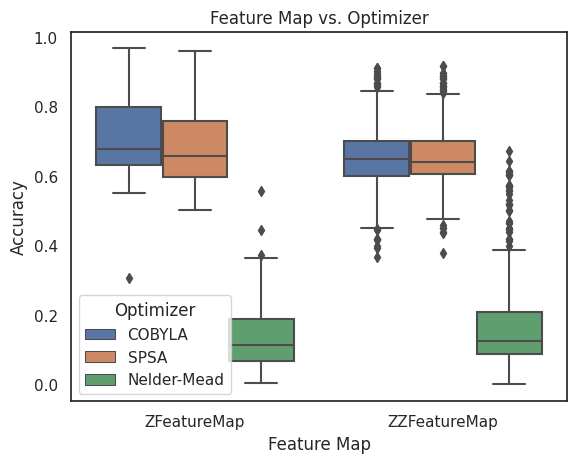

In [97]:
sns.boxplot(data=res, x='featuremap', y='accuracy', hue='optimizer', palette='deep', order=['z', 'zz'], hue_order=['cobyla', 'spsa', 'nelder_mead'])
plt.title('Feature Map vs. Optimizer')
plt.xlabel("Feature Map")
plt.ylabel("Accuracy")
f = plt.legend(title="Optimizer")
for text in f.get_texts():
    if text.get_text() == 'cobyla':
        text.set_text('COBYLA')
    elif text.get_text() == 'spsa':
        text.set_text('SPSA')
    elif text.get_text() == 'nelder_mead':
        text.set_text('Nelder-Mead')
plt.xticks([0, 1], ['ZFeatureMap', 'ZZFeatureMap'])
plt.savefig("../reports/figures/kdd_featmap_opt.png", bbox_inches='tight')
plt.show()